# **P1 Mile Stone 2** 💎

## 1. INTRODUCTION 👋

*   Nama: Karel Gideon Anugrah Hutajulu
*   Batch: FTDS HCK-004


### A. Inspiration for this project


This project was inspired by my first Milestone which analyzed traffic accidents in the city of leeds. Although the topic is the same the dataset for milestone 2 is different from the dataset used in phase 0 milestone 1.

- Inspiration (Tableu Dashboard Milestone 1): https://public.tableau.com/app/profile/karel.hutajulu/viz/Milestone-1CityofLeedsRoadTrafficAnalysis/Dashboard1

- Dataset Resource: https://www.kaggle.com/datasets/avikumart/road-traffic-severity-classification?resource=download 

### B. Framing the Problem



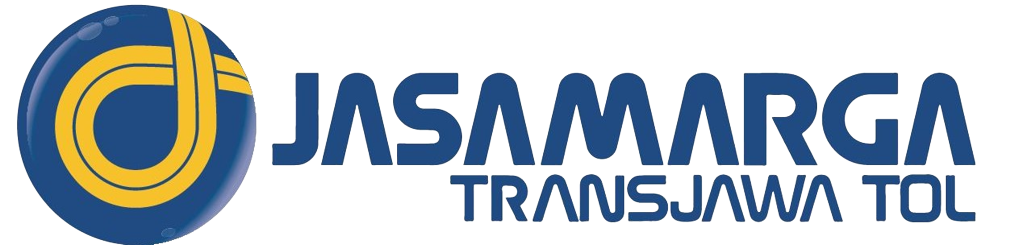

In [69]:
Image('/content/JTT logo.png')

1. **Problem Story** 🚫 📚


- Sarah is a dispatcher for a busy emergency services department operated by Jasamarga. Every day, she receives dozens of calls reporting road accidents, and she must quickly decide which ones require the most urgent response.

- Unfortunately, Sarah often lacks crucial information about the accidents that would help her to prioritize responses. She knows the location and the type of vehicles involved from street cameras, she also knows the weather from a weather office, but she doesn't know the severity of the accidents. As a result, she must stay on the side of caution and dispatch a full emergency response to every call, which can be costly and inefficient.

- Sarah's department has access to a large dataset of past road accidents, but they lack the tools to analyze the data and predict the severity of future accidents. They believe that if they could accurately predict the severity of accidents based on factors such as weather, road conditions, and location, they could respond more efficiently and effectively.





2. **Solution** ✅


- To address this problem, the department has hired a team of data scientists from Hactiv8 to build a machine learning model that can predict the severity of road accidents based on past data. 

- The team will use supervised learning algorithms to identify patterns and relationships between the various factors that contribute to accident severity. The objective of the project is to build a model that accurately predicts the severity of accidents, allowing emergency services to respond more efficiently and potentially saving lives.

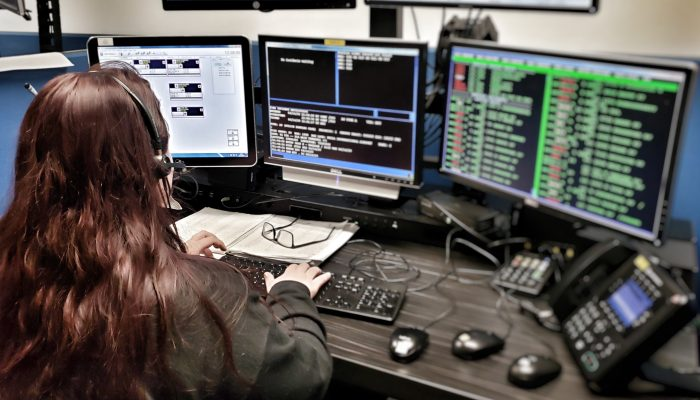

In [70]:
Image('/content/Carlie-700x400.jpg')

### C. Business Objective ⛹


**1. EDA Objective** 👍

- Improving Road Safety: The ultimate objective of any analysis of road accident data is to improve road safety. By identifying the factors that contribute to accidents, Jasamarga can develop targeted interventions to improve safety for drivers, cyclists, and pedestrians.

**2. ML Model Objective** 👍

- While emergency services may be able to identify the severity of an accident on the scene, this information may not be immediately available to other stakeholders such as transportation departments or insurance companies. Additionally, emergency services may not always be able to accurately predict the severity of an accident, particularly in cases where the full extent of injuries or damage is not immediately apparent.

- By building a machine learning model that can predict the severity of accidents based on a range of factors such as weather, road conditions, and location, we can provide a more complete and accurate picture of the risks and impacts of accidents. This information can be used by a range of stakeholders to make more informed decisions about road safety and emergency response.

- Moreover, machine learning models can process large amounts of data and identify patterns that may not be immediately apparent to humans, potentially allowing for the identification of previously unrecognized risk factors or correlations. This can help to inform public policy and improve road safety in the long term.

### D. Business Benefits 💰

- Improved road safety can lead to fewer accidents and injuries, which can `reduce the costs of emergency services and healthcare`. This can help to improve the financial stability of Jasamarga by `reducing the amount spent on insurance claims and compensations`.
- By improving road safety, `Jasamarga can attract more customers, particularly those who are safety-conscious`. This can help to increase revenue and market share over time.
- Improved road safety can `enhance the reputation` of Jasamarga as a `responsible and safety-focused company`. This can help to build trust with customers, stakeholders, and the public at large, potentially `enhancing brand value and increasing customer loyalty`.
- With the ability to accurately predict accident severity, Jasamarga can improve its emergency response services by `deploying resources more efficiently and effectively`. This can help to `reduce the response time, reduce cost and improve the survival rates of accident victims.`


### E. Getting the Data



This data can be collected from a variety of sources, such as:
- police reports
- emergency services reports
- weather stations
- other public sources of accident data. 

The data would typically include information about the location, time, weather conditions, road conditions, types of vehicles involved, and any injuries or fatalities.



## 2. IMPORT LIBRARIES 💽

In [71]:
pip install dabl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [156]:
import pandas as pd
import numpy as np

#----------------------------

#Visualization for EDA
import matplotlib.pyplot as plt
import seaborn as sns
import dabl
sns.set_palette("crest")

#VIF
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
#----------------------------

# feature-engineering
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import SelectKBest, chi2

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

from sklearn import set_config
set_config(display="diagram")

from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import GridSearchCV

#model
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from imblearn.over_sampling import RandomOverSampler

#smote
from imblearn.over_sampling import SMOTE

#evaluasi
from sklearn.metrics import classification_report, confusion_matrix

#cross validation
from sklearn.model_selection import cross_val_score, cross_validate

#hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint

#----------------------------

#save model
import joblib


#Attach images to the google notebook
from IPython.display import Image


pd.set_option('display.max_columns', None)


## 3. DATA LOADING 💽

In [73]:
df = pd.read_csv('/content/RTA Dataset.csv')

In [74]:
#Display top 10 rows of dataframe df
df.head(10)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,Residential areas,NaN,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,Recreational areas,other,NaN,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,Office areas,other,Tangent road with mild grade and flat terrain,Y Shape,Earth roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,Industrial areas,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
5,14:15:00,Friday,31-50,Male,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y Shape,NaN,Dry,Daylight,Normal,Vehicle with vehicle collision,1,1,U-Turn,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Overloading,Slight Injury
6,17:30:00,Wednesday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,NaN,No defect,Residential areas,Undivided Two way,Tangent road with flat terrain,Crossing,NaN,Dry,Daylight,Normal,Vehicle with vehicle collision,1,1,Moving Backward,Driver or rider,Female,18-30,3,Driver,Normal,Not a Pedestrian,Other,Slight Injury
7,17:20:00,Friday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Governmental,Above 10yr,No defect,Residential areas,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,1,U-Turn,na,na,na,na,NaN,Normal,Not a Pedestrian,No priority to vehicle,Slight Injury
8,17:20:00,Friday,18-30,Male,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,1-2yr,No defect,Industrial areas,other,Tangent road with flat terrain,Y Shape,Earth roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,1,Going straight,Pedestrian,Male,Under 18,3,Driver,Normal,Crossing from driver's nearside,Changing lane to the right,Slight Injury
9,17:20:00,Friday,18-30,Male,Junior high school,Employee,1-2yr,Automobile,Owner,2-5yrs,No defect,Residential areas,Undivided Two way,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,1,U-Turn,Passenger,Male,18-30,3,Driver,Normal,Not a Pedestrian,Moving Backward,Serious Injury


In [75]:
#Display top 10 rows of dataframe df
df.tail(10)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
12306,17:10:00,Friday,18-30,Male,Junior high school,Employee,2-5yr,Lorry (11?40Q),Owner,1-2yr,No defect,Outside rural areas,Undivided Two way,Tangent road with flat terrain,Other,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,1,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Driving carelessly,Slight Injury
12307,17:10:00,Friday,31-50,Male,Junior high school,Employee,Above 10yr,Pick up upto 10Q,Governmental,Below 1yr,No defect,Outside rural areas,Undivided Two way,Tangent road with flat terrain,Other,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,1,1,Moving Backward,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
12308,17:10:00,Friday,18-30,Male,Junior high school,Employee,Above 10yr,Lorry (11?40Q),Owner,NaN,No defect,Outside rural areas,other,Steep grade downward with mountainous terrain,No junction,Asphalt roads with some distress,Wet or damp,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Other,na,na,na,na,Self-employed,Normal,Not a Pedestrian,Driving carelessly,Slight Injury
12309,9:05:00,Friday,31-50,Female,Elementary school,Employee,5-10yr,Pick up upto 10Q,Owner,NaN,No defect,School areas,other,Steep grade downward with mountainous terrain,No junction,Asphalt roads,Wet or damp,Darkness - lights lit,Normal,Collision with roadside objects,2,2,Going straight,Driver or rider,Male,18-30,3,Driver,Normal,Not a Pedestrian,Driving to the left,Slight Injury
12310,9:05:00,Friday,18-30,Male,NaN,Employee,NaN,Special vehicle,Owner,Above 10yr,No defect,Outside rural areas,Two-way (divided with broken lines road marking),Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,1,1,Reversing,Passenger,Male,Over 51,3,Employee,Normal,Not a Pedestrian,Changing lane to the left,Serious Injury
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,No defect,Outside rural areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,1,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,No defect,Outside rural areas,Two-way (divided with broken lines road marking),Escarpments,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,1,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,No defect,Outside rural areas,Two-way (divided with broken lines road marking),Tangent road with mountainous terrain and,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,1,1,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,No defect,Office areas,Undivided Two way,Tangent road with mountainous terrain and,No junction,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,1,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury
12315,13:55:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Other,Owner,2-5yrs,No defect,Outside rural areas,Undivided Two way

### Simple Data Understanding before we explore 🔍

In [76]:
df.dtypes

Time                           object
Day_of_week                    object
Age_band_of_driver             object
Sex_of_driver                  object
Educational_level              object
Vehicle_driver_relation        object
Driving_experience             object
Type_of_vehicle                object
Owner_of_vehicle               object
Service_year_of_vehicle        object
Defect_of_vehicle              object
Area_accident_occured          object
Lanes_or_Medians               object
Road_allignment                object
Types_of_Junction              object
Road_surface_type              object
Road_surface_conditions        object
Light_conditions               object
Weather_conditions             object
Type_of_collision              object
Number_of_vehicles_involved     int64
Number_of_casualties            int64
Vehicle_movement               object
Casualty_class                 object
Sex_of_casualty                object
Age_band_of_casualty           object
Casualty_sev

As you can see `Time` is object and we want to convert it to numeric.

First I convert `Time` column to datetime and only extract the hours.

In [77]:
# Convert the Time column to datetime
df['Time'] = pd.to_datetime(df['Time'])

# Extract the hour from the datetime and assign it back to the Time column
df['Time'] = df['Time'].dt.hour

In [78]:
df.head(1)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,Residential areas,NaN,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury


Next I change `day_of_week` column to datetime and only extract the hours.

Now we verify all the column names

In [79]:
# Extract the column names using the .columns method
column_names = df.columns

# Print the column names
print(column_names)

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')


and view how many rows of data do we have to work with.

In [80]:
df.shape

(12316, 32)

This is a large dataset, we have around 12,316 values in our dataset.

### Dealing with High Cardinality

In [81]:
category_col = df.select_dtypes(include=['object','category']).columns.tolist()
for column in df[category_col]:
    print(f'{column} : {df[column].unique()}')
    print()

Day_of_week : ['Monday' 'Sunday' 'Friday' 'Wednesday' 'Saturday' 'Thursday' 'Tuesday']

Age_band_of_driver : ['18-30' '31-50' 'Under 18' 'Over 51' 'Unknown']

Sex_of_driver : ['Male' 'Female' 'Unknown']

Educational_level : ['Above high school' 'Junior high school' nan 'Elementary school'
 'High school' 'Unknown' 'Illiterate' 'Writing & reading']

Vehicle_driver_relation : ['Employee' 'Unknown' 'Owner' nan 'Other']

Driving_experience : ['1-2yr' 'Above 10yr' '5-10yr' '2-5yr' nan 'No Licence' 'Below 1yr'
 'unknown']

Type_of_vehicle : ['Automobile' 'Public (> 45 seats)' 'Lorry (41?100Q)' nan
 'Public (13?45 seats)' 'Lorry (11?40Q)' 'Long lorry' 'Public (12 seats)'
 'Taxi' 'Pick up upto 10Q' 'Stationwagen' 'Ridden horse' 'Other' 'Bajaj'
 'Turbo' 'Motorcycle' 'Special vehicle' 'Bicycle']

Owner_of_vehicle : ['Owner' 'Governmental' nan 'Organization' 'Other']

Service_year_of_vehicle : ['Above 10yr' '5-10yrs' nan '1-2yr' '2-5yrs' 'Unknown' 'Below 1yr']

Defect_of_vehicle : ['No defect' nan

There are a lot of repeating data and data that has similar meaning. In order to reduce the cardinality of the data we will use a method called `grouping`.

1. Shortening / removing repeating data

In [82]:
#Education Level
df['Educational_level'] = df['Educational_level'].replace('unknown', 'Unknown')

#Owner_of_vehicle
df['Owner_of_vehicle'] = df['Owner_of_vehicle'].replace('Other', 'unknown')

#Road_surface_conditions
df['Road_surface_conditions'] = df['Road_surface_conditions'].replace('Flood over 3cm. deep', 'Flood')

#Road_surface_conditions
df['Driving_experience'] = df['Driving_experience'].replace('nan', 'unknown')

2. Grouping data by mapping

In [83]:

# Replace 'Public (> 45 seats)', 'Public (12 seats)', and 'Public (13?45 seats)' with 'Public'
df['Type_of_vehicle'] = df['Type_of_vehicle'].replace(['Public (> 45 seats)', 'Public (12 seats)', 'Public (13?45 seats)'], 'Public')

# Replace 'Lorry (11?40Q)', 'Long lorry', and 'Lorry (41?100Q)' with 'Lorry'
df['Type_of_vehicle'] = df['Type_of_vehicle'].replace(['Lorry (11?40Q)', 'Long lorry', 'Lorry (41?100Q)'], 'Lorry')

# Replace 'unknown' with 'Unknown'
df['Type_of_vehicle'] = df['Type_of_vehicle'].replace('unknown', 'Unknown')

# Combine 'Taxi', 'Stationwagen', and 'Automobile' into 'Automobile'
df['Type_of_vehicle'] = df['Type_of_vehicle'].replace(['Taxi', 'Stationwagen', 'Automobile'], 'Automobile')

# Combine 'Ridden horse', 'Bajaj', 'Special vehicle', and 'Turbo' into 'Other'
df['Type_of_vehicle'] = df['Type_of_vehicle'].replace(['Ridden horse', 'Bajaj', 'Special vehicle', 'Turbo'], 'Other')


In [84]:
# Cause_of_accident
cause_mapping = {
    'Moving Backward': 'Reckless driving',
    'Overtaking': 'Reckless driving',
    'Changing lane to the left': 'Reckless driving',
    'Changing lane to the right': 'Reckless driving',
    'Overloading': 'Vehicle condition',
    'No priority to vehicle': 'Traffic rules violation',
    'No priority to pedestrian': 'Traffic rules violation',
    'No distancing': 'Traffic rules violation',
    'Getting off the vehicle improperly': 'Improper driving',
    'Improper parking': 'Improper driving',
    'Overspeed': 'Reckless driving',
    'Driving carelessly': 'Reckless driving',
    'Driving at high speed': 'Reckless driving',
    'Driving to the left': 'Reckless driving',
    'Unknown': 'Other',
    'Overturning': 'Vehicle condition',
    'Turnover': 'Vehicle condition',
    'Driving under the influence of drugs': 'Driving under influence',
    'Drunk driving': 'Driving under influence'
}

df['Cause_of_accident'] = df['Cause_of_accident'].map(cause_mapping)

In [85]:
# Pedestrian_movement
Pedestrian_movement_mapping = {
    'Not a Pedestrian': 'Other',
    "Crossing from driver's nearside": 'Crossing',
    'Crossing from nearside - masked by parked or statioNot a Pedestrianry vehicle': 'Crossing',
    'Unknown or other': 'Other',
    'Crossing from offside - masked by  parked or statioNot a Pedestrianry vehicle': 'Crossing',
    'In carriageway, statioNot a Pedestrianry - not crossing  (standing or playing)': 'Other',
    'Walking along in carriageway, back to traffic': 'Other',
    'Walking along in carriageway, facing traffic': 'Other',
    'In carriageway, statioNot a Pedestrianry - not crossing  (standing or playing) - masked by parked or statioNot a Pedestrianry vehicle': 'Other'
}

df['Pedestrian_movement_category'] = df['Pedestrian_movement'].map(Pedestrian_movement_mapping)


In [86]:
# Type_of_collision
type_collision_mapping = {'Collision with roadside-parked vehicles': 'Collision with roadside',
                          'Collision with roadside objects': 'Collision with roadside',
                          'Collision with pedestrians': 'Pedestrian collision',
                          'With Train': 'Train collision',
                          'unknown': 'Unknown'}

# Applying the mapping to the feature column
df['Type_of_collision'] = df['Type_of_collision'].map(type_collision_mapping)


In [87]:
# Road_allignment
road_allignment_mapping = {'Tangent road with flat terrain': 'Flat terrain tangent road',
                           'Tangent road with mild grade and flat terrain': 'Flat terrain tangent road',
                           'Tangent road with rolling terrain': 'Flat terrain tangent road',
                           'Tangent road with mountainous terrain and': 'Mountainous terrain tangent road',
                           'Steep grade downward with mountainous terrain': 'Mountainous terrain tangent road',
                           'unknown': 'Unknown'}

# Applying the mapping to the feature column
df['Road_allignment'] = df['Road_allignment'].map(road_allignment_mapping)


In [88]:
# Lanes_or_Medians
lanes_mapping = {'Double carriageway (median)': 'Divided highway',
                 'Two-way (divided with solid lines road marking)': 'Divided highway',
                 'Two-way (divided with broken lines road marking)': 'Divided highway',
                 'Undivided Two way': 'Undivided road',
                 'One way': 'Undivided road',
                 'other': 'Other',
                 'unknown': 'Unknown'}

# Applying the mapping to the feature column
df['Lanes_or_Medians'] = df['Lanes_or_Medians'].map(lanes_mapping)


3. Removing unrelated columns

Columns `Fitness_of_casuality`,`Work_of_casuality` and `Area_accident_occured`  logically has no relationship with our target variable. Therefore before feature selection we will drop it

In [89]:
df = df.drop(['Fitness_of_casuality', 'Work_of_casuality', 'Area_accident_occured'], axis=1)

4.  Checking Cardinality after dealing

In [244]:
category_col = df.select_dtypes(include=['object','category']).columns.tolist()
for column in df[category_col]:
    print(f'{column} : {df[column].unique()}')
    print()

Day_of_week : ['Monday' 'Sunday' 'Friday' 'Wednesday' 'Saturday' 'Thursday' 'Tuesday']

Age_band_of_driver : ['18-30' '31-50' 'Under 18' 'Over 51' 'Unknown']

Sex_of_driver : ['Male' 'Female' 'Unknown']

Educational_level : ['Above high school' 'Junior high school' 'unknown' 'Elementary school'
 'High school' 'Unknown' 'Illiterate' 'Writing & reading']

Vehicle_driver_relation : ['Employee' 'Unknown' 'Owner' 'unknown' 'Other']

Driving_experience : ['1-2yr' 'Above 10yr' '5-10yr' '2-5yr' 'unknown' 'No Licence' 'Below 1yr']

Type_of_vehicle : ['Automobile' 'Public' 'Lorry' 'unknown' 'Pick up upto 10Q' 'Other'
 'Motorcycle' 'Bicycle']

Owner_of_vehicle : ['Owner' 'Governmental' 'unknown' 'Organization']

Service_year_of_vehicle : ['Above 10yr' '5-10yrs' 'unknown' '1-2yr' '2-5yrs' 'Unknown' 'Below 1yr']

Defect_of_vehicle : ['No defect' 'unknown' '7' '5']

Lanes_or_Medians : ['unknown' 'Undivided road' 'Other' 'Divided highway']

Road_allignment : ['Flat terrain tangent road' 'unknown' 'Mo

## 4. EXPLORATORY DATA ANALYSIS (EDA) 🎁

Before we dive into EDA its best for us to read and understand the definition of each columns.

### Definition of columns



- `Time`  - time of the accident (in 24 hours format)
- `Day_of_week` -A day when an accident occurred
- `Age_band_of_driver`  - Age group of the driver
- `Sex_of_driver`  - Gender of driver 
- `Educational_level`  - Driver's highest education level
- `Vehical_driver_relation`  - What's the relation of a driver with the vehicle
- `Driving_experience`  - How many years of driving experience the driver has
- `Type_of_vehicle`  - What's the type of vehicle 
- `Owner_of_vehicle`  - Who's the owner of the vehicle
- `Service_year_of_vehicle` - The last service year of the vehicle
- `Defect_of_vehicle`  - Is there any defect on the vehicle or not?
- `Area_accident_occured`  - Locality of an accident site
- `Lanes_or_Medians`  - Are there any lanes or medians at the accident site? 
- `Road_allignment`  - Road alignment with the terrain of the land
- `Types_of_junction`  - Type of junction at the accident site
- `Road_surface_type`  - A surface type of road
- `Road_surface_conditions` - What was the condition of the road surface?
- `Light_conditions`  - Lighting conditions at the site
- `Weather_conditions ` - Weather conditions
- `Type_of_collision`  - What is the type of collision
- `Number_of_vehicles_involved`  - Total number of vehicles involved in an accident
- `Number_of_casualties`  - Total number of casualties
- `Vehicle_movement`  - How the vehicle was moving before the accident occurred
- `Casualty_class` - A person who got killed during an accident
- `Sex_of_casualty`  - What the gender of a person who got killed
- `Age_band_of_casualty` - Age group of casualty
- `Casualty_severtiy`  - How severely the casualty was injured 
- `Work_of_casualty`  - What was the work of the casualty
- `Fitness_of_casualty`  - Fitness level of casualty 
- `Pedestrain_movement`  - Was there any pedestrian movement on the road?
- `Cause_of-accident`  - What was the cause of an accident?
- `**Accident_severity **` - How severe an accident was? (Target variable)

### A. Descriptive Statistic

In [90]:
df.describe()

,Time,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000,12316.000000
mean,13.835823,2.040679,1.548149
std,5.202923,0.688790,1.007179
min,0.000000,1.000000,1.000000
25%,10.000000,2.000000,1.000000
50%,15.000000,2.000000,1.000000
75%,18.000000,2.000000,2.000000
max,23.000000,7.000000,8.000000


**Observation:**

There are only 2 numerical column in our dataset.


- On average, each accident involved 2.04 vehicles and resulted in 1.55 casualties.
- The standard deviation for the number of vehicles involved is 0.69, indicating that there is relatively little variation in the number of vehicles involved in accidents in the dataset.
- The maximum number of vehicles involved in an accident is 7, while the maximum number of casualties is 8.
- The median number of vehicles involved and casualties is both 2, indicating that half of the accidents in the dataset involved 2 vehicles and resulted in 1 casualty.
- 75% of accidents involved 2 or fewer vehicles, while 75% of accidents resulted in 2 or fewer casualties, indicating that the majority of accidents in the dataset are relatively minor.

### B. Univariate Analysis

**1. Target Class Distribution**

<Axes: xlabel='Accident_severity', ylabel='count'>

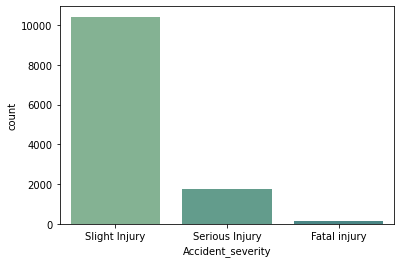

In [91]:
sns.countplot(x='Accident_severity', data=df)

**Observation:**

As we can see the target variable is imbalanced. This can cause further problems when training our ML Model. We will solve this problem later by using SMOTE (Synthetic Minority Oversampling Technique)

**2. Features Distribution**

To see the bigger picture we will plot all the categorical data into barplots, but before we do this let us check if there are any high cardinality columns

In [92]:
# Select columns of categorical data type
c_val = df.select_dtypes(include='object').columns.tolist()

# Print the list of column names
print(c_val)

['Day_of_week', 'Age_band_of_driver', 'Sex_of_driver', 'Educational_level', 'Vehicle_driver_relation', 'Driving_experience', 'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle', 'Defect_of_vehicle', 'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction', 'Road_surface_type', 'Road_surface_conditions', 'Light_conditions', 'Weather_conditions', 'Type_of_collision', 'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity', 'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity', 'Pedestrian_movement_category']


**Checking columns cardinality**

In [93]:
# check for cardinality in categorical variables

for var in c_val:
    
    print(var, ' contains ', len(df[var].unique()), ' labels')

Day_of_week  contains  7  labels
Age_band_of_driver  contains  5  labels
Sex_of_driver  contains  3  labels
Educational_level  contains  8  labels
Vehicle_driver_relation  contains  5  labels
Driving_experience  contains  8  labels
Type_of_vehicle  contains  8  labels
Owner_of_vehicle  contains  5  labels
Service_year_of_vehicle  contains  7  labels
Defect_of_vehicle  contains  4  labels
Lanes_or_Medians  contains  4  labels
Road_allignment  contains  3  labels
Types_of_Junction  contains  9  labels
Road_surface_type  contains  6  labels
Road_surface_conditions  contains  4  labels
Light_conditions  contains  4  labels
Weather_conditions  contains  9  labels
Type_of_collision  contains  4  labels
Vehicle_movement  contains  14  labels
Casualty_class  contains  4  labels
Sex_of_casualty  contains  3  labels
Age_band_of_casualty  contains  6  labels
Casualty_severity  contains  4  labels
Pedestrian_movement  contains  9  labels
Cause_of_accident  contains  7  labels
Accident_severity  co

**Observation:**

We will only plot columns with cardinality <8 so that the bar plot is not too cluttered


In the mean time we will analyze low cardinality columns.

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


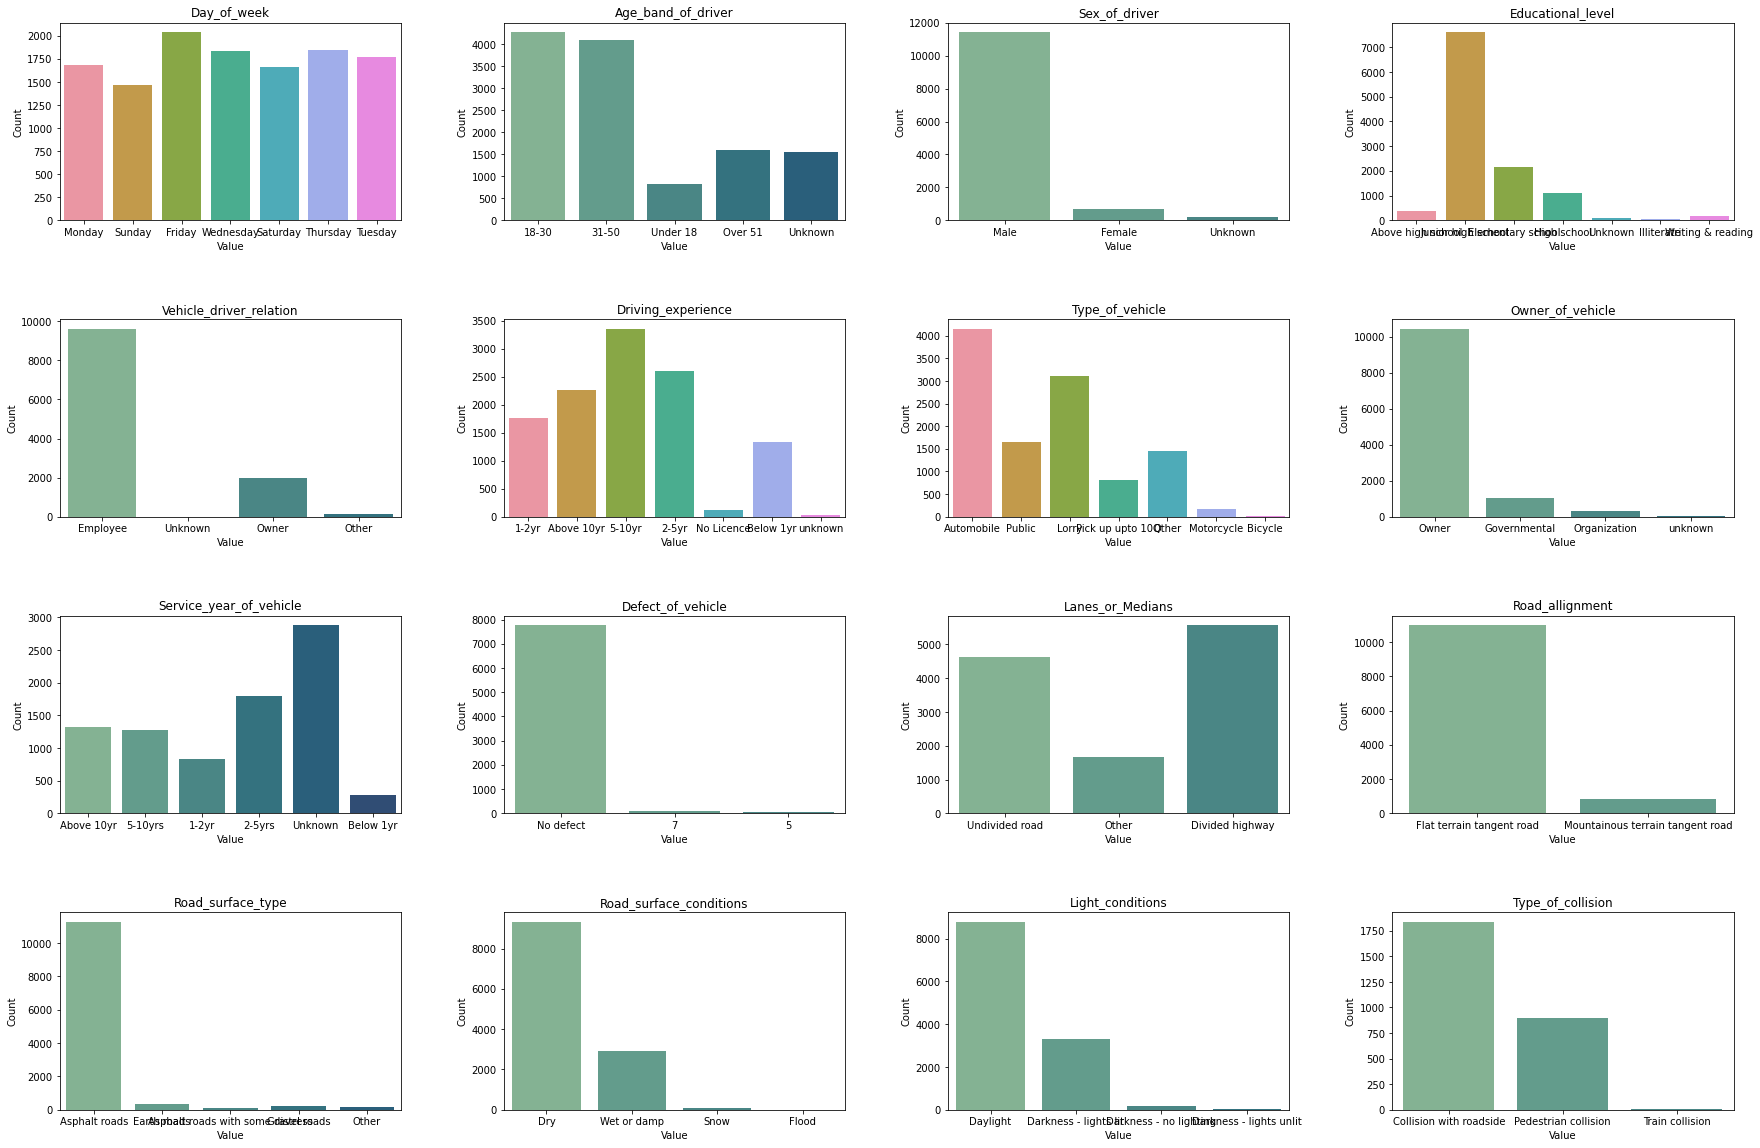

In [94]:
# Create a list of column names with less than 7 unique values
low_cardinality = [col for col in df.columns if df[col].nunique() < 8]

# Set up subplots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(30, 20), tight_layout=True, 
                         gridspec_kw={"hspace": 0.5, "wspace": 0.3})

# Plot a bar chart for each categorical column
for col, ax in zip(low_cardinality, axes.flatten()):
    sns.countplot(data=df, x=col, ax=ax)
    ax.set_title(col)
    ax.set_xlabel('Value')
    ax.set_ylabel('Count')

plt.show()

**Observation:**
- The data is more or less distributed equally between all the days of the week
- Most drivers in the data is in the age band of 18-50 years old which is optimal working age
- There are significantly more male than female drivers in the data
- Most drivers have their final education as highschool
- Most casualties in the data is recorded when an employee is driving their company car.
- Driving experience is varied, this is expected because age band of driver is also varied
- Most crashes in our data happens for automobile vehicles.

### C. Bivariate Analysis

**1. Relationship between Categorical Features and Target**

 ``` python
 pip install dabl
 ```

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Target looks like classification
Linear Discriminant Analysis training set score: 0.333
Showing only top 10 of 29 categorical features


[<Axes: title={'center': 'Target distribution'}, xlabel='count', ylabel='Accident_severity'>,
 [array([[<Axes: ylabel='Time'>, <Axes: >],
         [<Axes: xlabel='Time', ylabel='Number_of_casualties'>,
          <Axes: xlabel='Number_of_casualties'>]], dtype=object),
  <Figure size 576x288 with 2 Axes>,
  <Figure size 288x288 with 1 Axes>],
 array([[<Axes: title={'center': 'Number_of_vehicles_involved'}>,
         <Axes: title={'center': 'Types_of_Junction'}>,
         <Axes: title={'center': 'Age_band_of_driver'}>,
         <Axes: title={'center': 'Weather_conditions'}>,
         <Axes: title={'center': 'Day_of_week'}>],
        [<Axes: title={'center': 'Light_conditions'}>,
         <Axes: title={'center': 'Driving_experience'}>,
         <Axes: title={'center': 'Vehicle_movement'}>,
         <Axes: title={'center': 'Cause_of_accident'}>,
         <Axes: title={'center': 'Type_of_vehicle'}>]], dtype=object)]

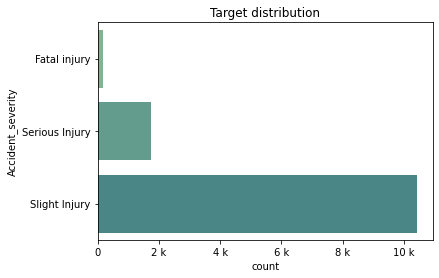

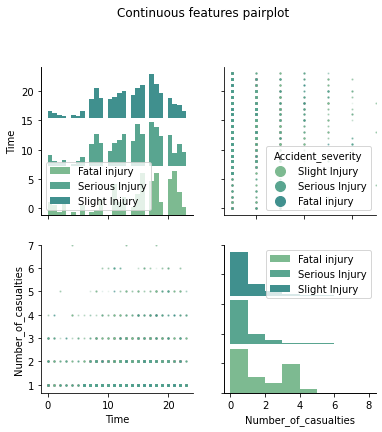

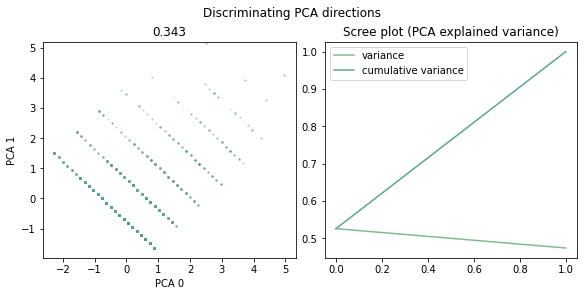

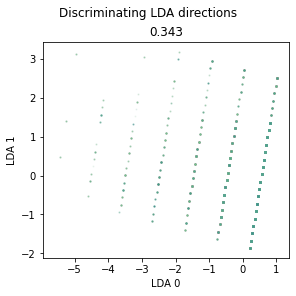

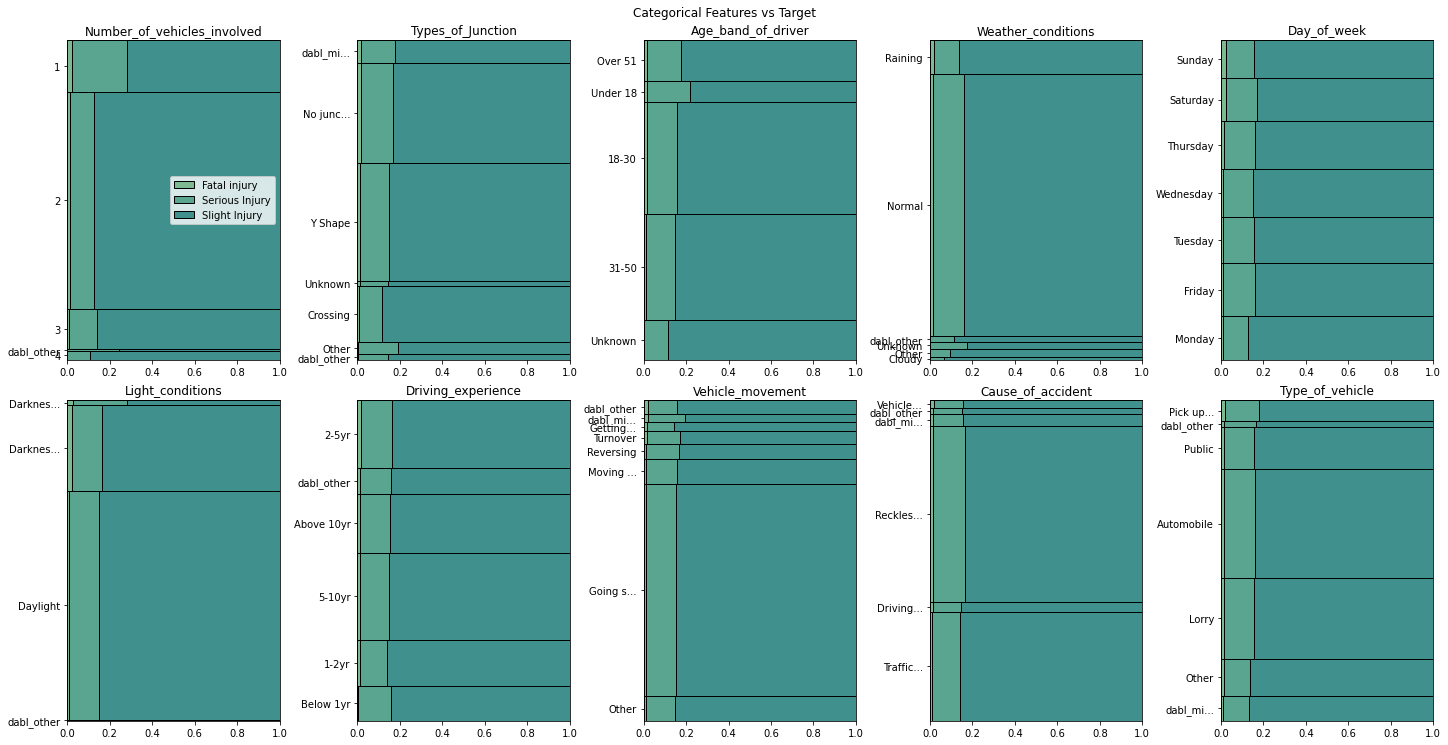

In [95]:
# Visualizing dataset using dabl library

dabl.plot(df, target_col='Accident_severity', plot_res='pairplot+class')

**Observation:**

- Other types of junction produces a higher proportion of high severity accidents compared to other types of junctions.
- When drivers is in the age band of under 18, they are more likely to experience severe accidents
- Unknown weather conditions produce more severe accidents
- Poor Light conditions without lighting during the night significantly increase the proportion of severe accidents

**2. Relationship between Numerical Features and Target** 

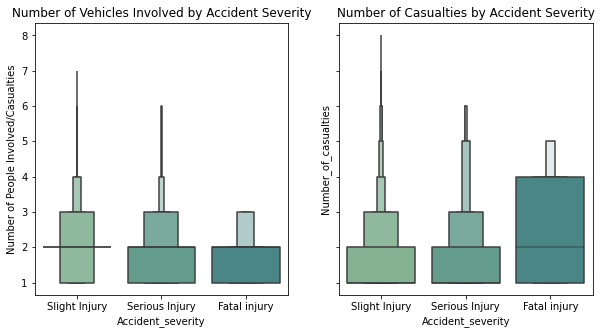

In [96]:

# Set up the plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), sharey=True)

# Boxenplot for number of vehicles involved by accident severity
sns.boxenplot(data=df, x='Accident_severity', y='Number_of_vehicles_involved', ax=axes[0])
axes[0].set_title('Number of Vehicles Involved by Accident Severity')

# Boxenplot for number of casualties by accident severity
sns.boxenplot(data=df, x='Accident_severity', y='Number_of_casualties', ax=axes[1])
axes[1].set_title('Number of Casualties by Accident Severity')

# Set the y-axis label
axes[0].set_ylabel('Number of People Involved/Casualties')

plt.show()

**Observation:**

- We can see that there is no correlation between number of people involved  towards the severity of the accident
- We can see that there is  correlation between number of casualties involved  towards the severity of the accident
- We would have guessed that if the number of people casualties is higher it would be a more sever accident.
- Visually we can see this ebcause the boxenplot is wider in Number of casualties for fatal injury compared to for slight injury and serious injury.

## 5. Data Cleaning 🐠


### A. Dealing with duplicates

In [97]:
df.duplicated().sum()

0

**Observation:**

There are no duplicates in this dataset

### B. Dealing with Missing values (with MAR/MCAR/MNAR analysis)

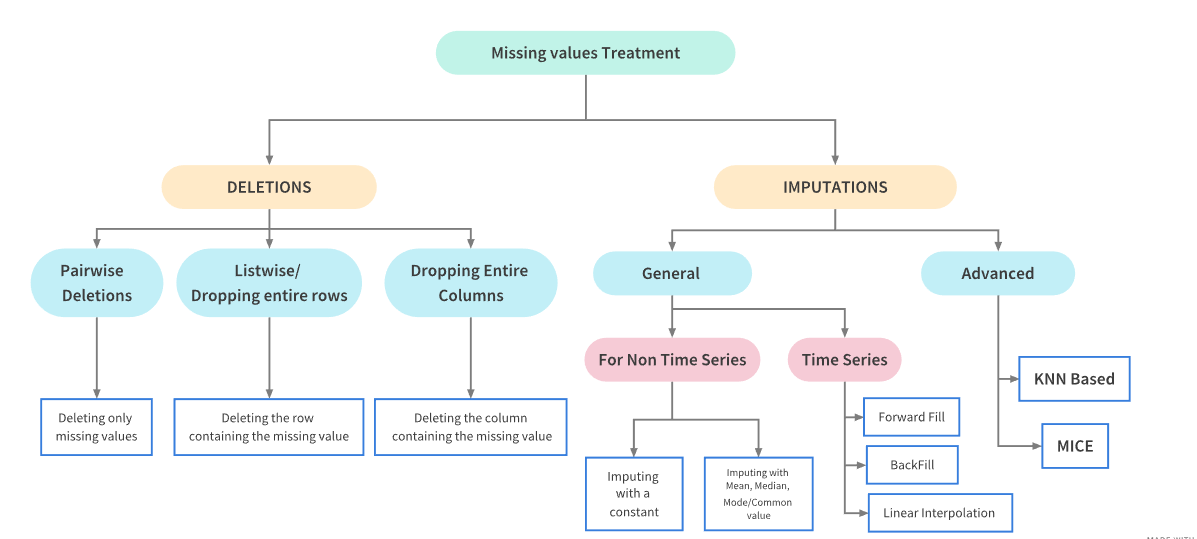

In [98]:
Image('/content/68u0dD2.png')

There could be multiple reasons for the missing values but primarily the reason for missingness can be attributed to:

- Data doesn't exist
- Data not collected due to human error
- Data accidentally deleted

In [99]:
df.isna().sum() 

Time                               0
Day_of_week                        0
Age_band_of_driver                 0
Sex_of_driver                      0
Educational_level                741
Vehicle_driver_relation          579
Driving_experience               829
Type_of_vehicle                  950
Owner_of_vehicle                 482
Service_year_of_vehicle         3928
Defect_of_vehicle               4427
Lanes_or_Medians                 442
Road_allignment                  494
Types_of_Junction                887
Road_surface_type                172
Road_surface_conditions            0
Light_conditions                   0
Weather_conditions                 0
Type_of_collision               9571
Number_of_vehicles_involved        0
Number_of_casualties               0
Vehicle_movement                 308
Casualty_class                     0
Sex_of_casualty                    0
Age_band_of_casualty               0
Casualty_severity                  0
Pedestrian_movement                0
C

**Reason for missing values**

1. Missing Completely at Random (MCAR)

The missing values on a given variable (Y) are not associated with other variables in a given data set or with the variable (Y) itself. In other words, there is no particular reason for the missing values.

2. Missing at Random (MAR)

MAR occurs when the missingness is not random, but where missingness can be fully accounted for by variables where there is complete information.

3. Missing Not at Random (MNAR)

Missingness depends on unobserved data or the value of the missing data itself.


Source: https://www.kaggle.com/code/parulpandey/a-guide-to-handling-missing-values-in-python 

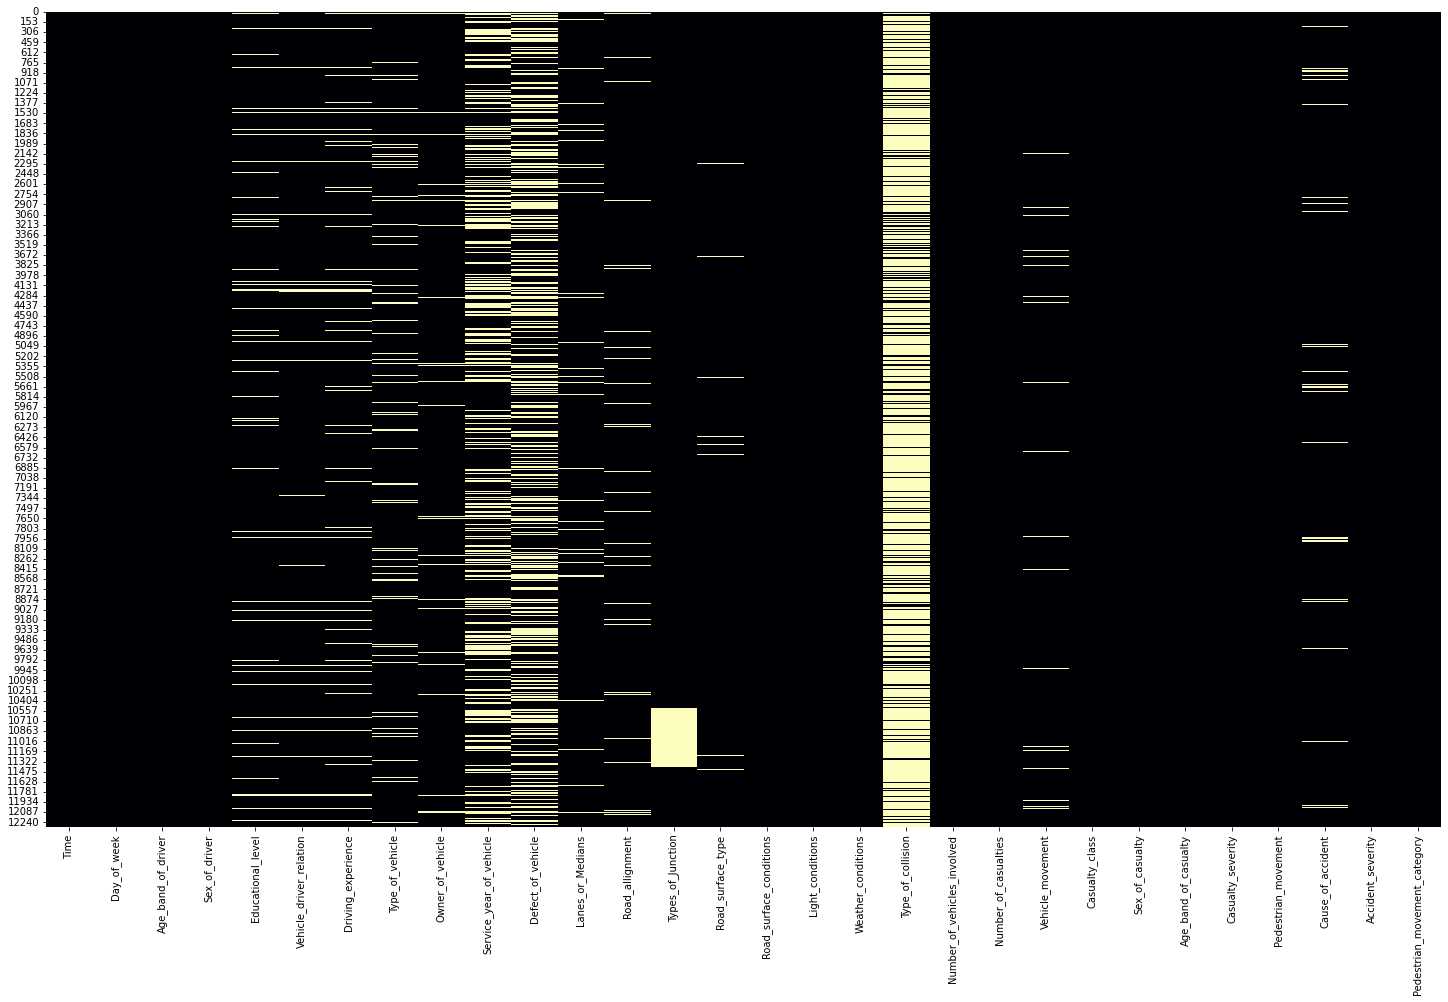

In [100]:
plt.figure(figsize=(25, 15)) # set figure size
sns.heatmap(df.isnull(), cmap='magma', cbar=False)
plt.show()

**Observation:**
- The missing data is suspected to be `MAR`
- If intel was not able to identify for example the values for education_level and vehicle_driver relation, they are most likely to now know the driving experience. This maybe because they are not able to interview the driver.

**Action:**
Because there are a lot of missing values, we will not delete the columns but instead impute the value with 'Unknown'.

In [101]:
# Check which columns contain missing values
cols_with_missing = df.columns[df.isnull().any()].tolist()

# Print the columns with missing values
print("Columns with missing values:", cols_with_missing)

Columns with missing values: ['Educational_level', 'Vehicle_driver_relation', 'Driving_experience', 'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle', 'Defect_of_vehicle', 'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction', 'Road_surface_type', 'Type_of_collision', 'Vehicle_movement', 'Cause_of_accident']


Impute missing values with 'unknown'

In [102]:
df['Educational_level'].fillna('unknown', inplace=True)
df['Vehicle_driver_relation'].fillna('unknown', inplace=True)
df['Driving_experience'].fillna('unknown', inplace=True)
df['Type_of_vehicle'].fillna('unknown', inplace=True)
df['Cause_of_accident'].fillna('unknown', inplace=True)
df['Owner_of_vehicle'].fillna('unknown', inplace=True)
df['Service_year_of_vehicle'].fillna('unknown', inplace=True)
df['Defect_of_vehicle'].fillna('unknown', inplace=True)
df['Lanes_or_Medians'].fillna('unknown', inplace=True)
df['Road_allignment'].fillna('unknown', inplace=True)
df['Types_of_Junction'].fillna('unknown', inplace=True)
df['Road_surface_type'].fillna('unknown', inplace=True)
df['Type_of_collision'].fillna('unknown', inplace=True)
df['Vehicle_movement'].fillna('unknown', inplace=True)

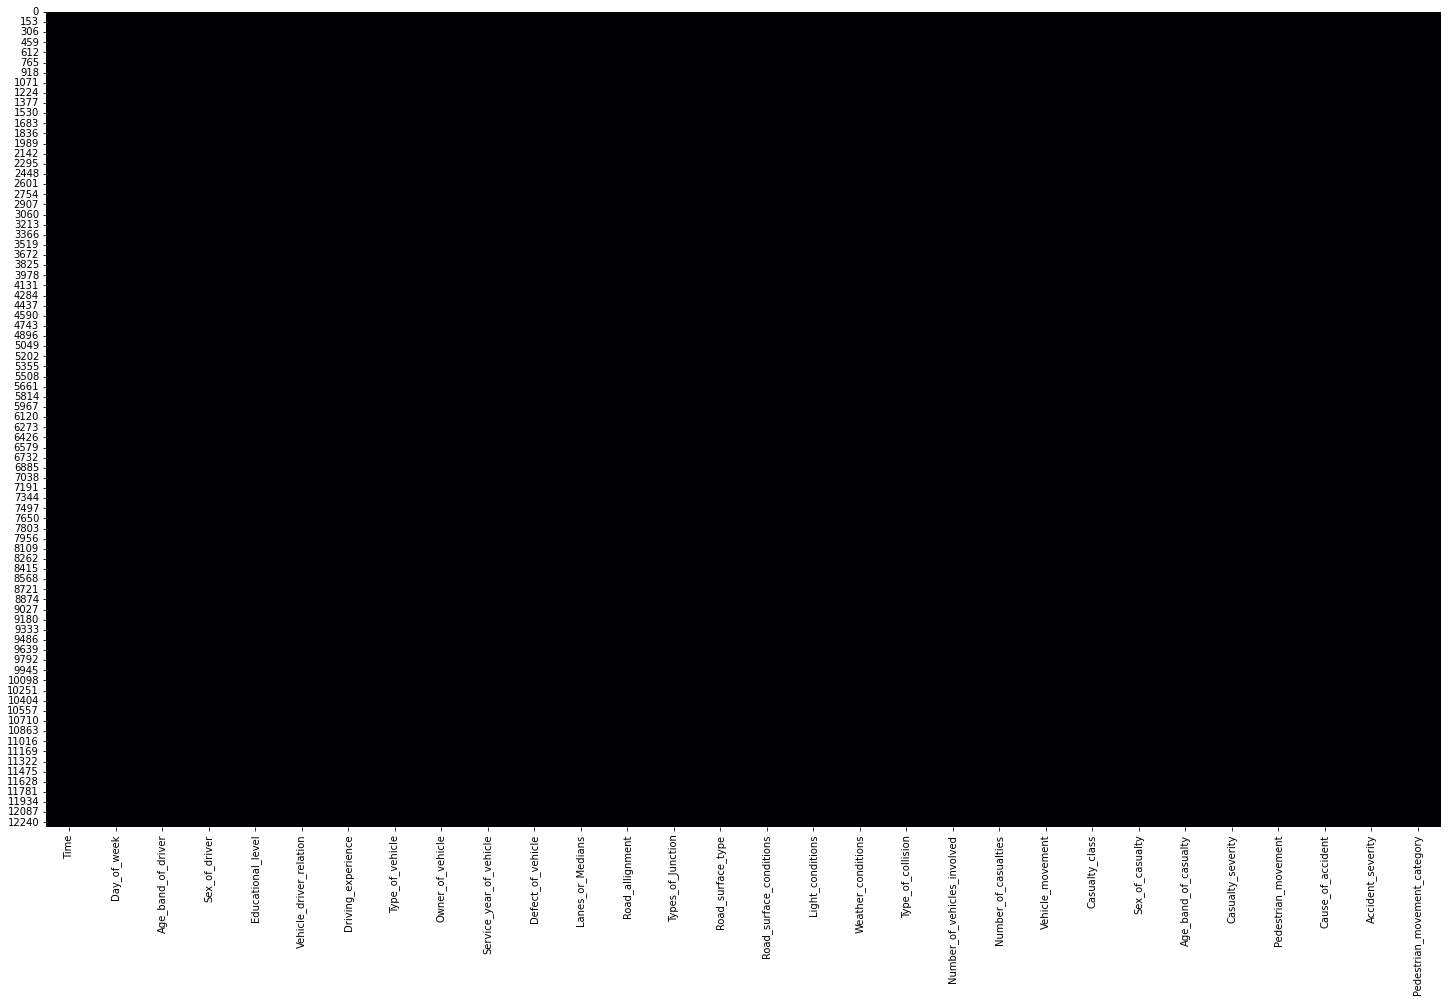

In [103]:
plt.figure(figsize=(25, 15)) # set figure size
sns.heatmap(df.isnull(), cmap='magma', cbar=False)
plt.show()

### C. Dealing with Outliers

Outliers can be caused by various reasons, including:

- Measurement errors: Outliers may be caused by measurement errors or data entry errors, such as recording incorrect values or data points that are far from the actual values.

- Natural variation: Some outliers may be due to natural variation in the data. 

- Data processing errors: Outliers can be introduced during data processing, such as when data is transformed, cleaned, or normalized in a way that introduces extreme values.

- Extreme events: In some cases, outliers may be due to extreme events, such as a natural disaster or a financial crisis.

I will not be dealing with outliers in this project because there is no outliers in this dataset because `most of the columns are categorical` and the numerical variable does not seem to have outliers as shown on the `df.describe` result.

In [104]:
df.describe()

,Time,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000,12316.000000
mean,13.835823,2.040679,1.548149
std,5.202923,0.688790,1.007179
min,0.000000,1.000000,1.000000
25%,10.000000,2.000000,1.000000
50%,15.000000,2.000000,1.000000
75%,18.000000,2.000000,2.000000
max,23.000000,7.000000,8.000000


## 6. Feature Engineering 🔧



### A. Splitting Data

**Split dataset to X and Y variables**

In [105]:
x = df.drop('Accident_severity', axis=1)
y = df['Accident_severity']

**Perform 80/20 Data split**

In [106]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

**Data Dimension**

In [107]:
x_train.shape, y_train.shape

((9852, 29), (9852,))

In [108]:
x_test.shape, y_test.shape

((2464, 29), (2464,))

### B. Scaling and Encoding 

**1. Encoding Data (One Hot Encoding)**

In [131]:
# Membuat instance dari OneHotEncoder
encoder = OneHotEncoder(sparse=True)

In [132]:
object_cols = x_train.select_dtypes(include=['object']).columns.tolist()

object_cols

['Day_of_week',
 'Age_band_of_driver',
 'Sex_of_driver',
 'Educational_level',
 'Vehicle_driver_relation',
 'Driving_experience',
 'Type_of_vehicle',
 'Owner_of_vehicle',
 'Service_year_of_vehicle',
 'Defect_of_vehicle',
 'Lanes_or_Medians',
 'Road_allignment',
 'Types_of_Junction',
 'Road_surface_type',
 'Road_surface_conditions',
 'Light_conditions',
 'Weather_conditions',
 'Type_of_collision',
 'Vehicle_movement',
 'Casualty_class',
 'Sex_of_casualty',
 'Age_band_of_casualty',
 'Casualty_severity',
 'Pedestrian_movement',
 'Cause_of_accident',
 'Pedestrian_movement_category']

In [133]:
# Fit the encoder on the categorical columns of the training set and transform the data
x_train_encoded = encoder.fit_transform(x_train[object_cols])

# Get the feature names for the encoded data
feature_names = encoder.get_feature_names_out(object_cols)

# Create a DataFrame from the encoded training set with the feature names as column names
x_train_encoded = pd.DataFrame.sparse.from_spmatrix(x_train_encoded, columns=feature_names)

# Transform the categorical columns of the testing set using the same encoder and feature names
x_test_encoded = encoder.transform(x_test[object_cols])

# Create a DataFrame from the encoded testing set with the feature names as column names
x_test_encoded = pd.DataFrame.sparse.from_spmatrix(x_test_encoded, columns=feature_names)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [134]:
x_train_encoded.head(1)

,Day_of_week_Friday,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,Age_band_of_driver_18-30,Age_band_of_driver_31-50,Age_band_of_driver_Over 51,Age_band_of_driver_Under 18,Age_band_of_driver_Unknown,Sex_of_driver_Female,Sex_of_driver_Male,Sex_of_driver_Unknown,Educational_level_Above high school,Educational_level_Elementary school,Educational_level_High school,Educational_level_Illiterate,Educational_level_Junior high school,Educational_level_Unknown,Educational_level_Writing & reading,Educational_level_unknown,Vehicle_driver_relation_Employee,Vehicle_driver_relation_Other,Vehicle_driver_relation_Owner,Vehicle_driver_relation_Unknown,Vehicle_driver_relation_unknown,Driving_experience_1-2yr,Driving_experience_2-5yr,Driving_experience_5-10yr,Driving_experience_Above 10yr,Driving_experience_Below 1yr,Driving_experience_No Licence,Driving_experience_unknown,Type_of_vehicle_Automobile,Type_of_vehicle_Bicycle,Type_of_vehicle_Lorry,Type_of_vehicle_Motorcycle,Type_of_vehicle_Other,Type_of_vehicle_Pick up upto 10Q,Type_of_vehicle_Public,Type_of_vehicle_unknown,Owner_of_vehicle_Governmental,Owner_of_vehicle_Organization,Owner_of_vehicle_Owner,Owner_of_vehicle_unknown,Service_year_of_vehicle_1-2yr,Service_year_of_vehicle_2-5yrs,Service_year_of_vehicle_5-10yrs,Service_year_of_vehicle_Above 10yr,Service_year_of_vehicle_Below 1yr,Service_year_of_vehicle_Unknown,Service_year_of_vehicle_unknown,Defect_of_vehicle_5,Defect_of_vehicle_7,Defect_of_vehicle_No defect,Defect_of_vehicle_unknown,Lanes_or_Medians_Divided highway,Lanes_or_Medians_Other,Lanes_or_Medians_Undivided road,Lanes_or_Medians_unknown,Road_allignment_Flat terrain tangent road,Road_allignment_Mountainous terrain tangent road,Road_allignment_unknown,Types_of_Junction_Crossing,Types_of_Junction_No junction,Types_of_Junction_O Shape,Types_of_Junction_Other,Types_of_Junction_T Shape,Types_of_Junction_Unknown,Types_of_Junction_X Shape,Types_of_Junction_Y Shape,Types_of_Junction_unknown,Road_surface_type_Asphalt roads,Road_surface_type_Asphalt roads with some distress,Road_surface_type_Earth roads,Road_surface_type_Gravel roads,Road_surface_type_Other,Road_surface_type_unknown,Road_surface_conditions_Dry,Road_surface_conditions_Flood,Road_surface_conditions_Snow,Road_surface_conditions_Wet or damp,Light_conditions_Darkness - lights lit,Light_conditions_Darkness - lights unlit,Light_conditions_Darkness - no lighting,Light_conditions_Daylight,Weather_conditions_Cloudy,Weather_conditions_Fog or mist,Weather_conditions_Normal,Weather_conditions_Other,Weather_conditions_Raining,Weather_conditions_Raining and Windy,Weather_conditions_Snow,Weather_conditions_Unknown,Weather_conditions_Windy,Type_of_collision_Collision with roadside,Type_of_collision_Pedestrian collision,Type_of_collision_Train collision,Type_of_collision_unknown,Vehicle_movement_Entering a junction,Vehicle_movement_Getting off,Vehicle_movement_Going straight,Vehicle_movement_Moving Backward,Vehicle_movement_Other,Vehicle_movement_Overtaking,Vehicle_movement_Parked,Vehicle_movement_Reversing,Vehicle_movement_Stopping,Vehicle_movement_Turnover,Vehicle_movement_U-Turn,Vehicle_movement_Unknown,Vehicle_movement_Waiting to go,Vehicle_movement_unknown,Casualty_class_Driver or rider,Casualty_class_Passenger,Casualty_class_Pedestrian,Casualty_class_na,Sex_of_casualty_Female,Sex_of_casualty_Male,Sex_of_casualty_na,Age_band_of_casualty_18-30,Age_band_of_casualty_31-50,Age_band_of_casualty_5,Age_band_of_casualty_Over 51,Age_band_of_casualty_Under 18,Age_band_of_casualty_na,Casualty_severity_1,Casualty_severity_2,Casualty_severity_3,Casualty_severity_na,Pedestrian_movement_Crossing from driver's nearside,Pedestrian_movement_Crossing from nearside - masked by parked or statioNot a Pedestrianry vehicle,Pedestrian_movement_Crossing from offside - masked by parked or statioNot a Pedestrianry vehicle,"Pedestrian_movement_In carriageway, statioNot a Pedestrianry - not cro

**2. Scaling Data (Standard Scaler)**

First I will calculate the skew of continous numerical columns to figure out the best scaling method to use. 

In [135]:
skewness = df[['Time','Number_of_casualties', 'Number_of_vehicles_involved']].skew()
print(skewness)

Time                          -0.505612
Number_of_casualties           2.344769
Number_of_vehicles_involved    1.323454
dtype: float64


**Observation:**

The  features, `Time`,`Number_of_casualties, Number_of_vehicles_involved`  have `relatively low skewness values`, which suggests thatthey may be closer to a normal distribution. 

However, the skewness values are not extremely low, so it may still be beneficial to use `standard scaling` to handle any potential outliers and to ensure that all features are on the same scale.

In [136]:
# Extract the columns to be scaled
cols_to_scale = ['Time','Number_of_casualties', 'Number_of_vehicles_involved']

# Create a StandardScaler object and fit it to the training data
scaler = StandardScaler()
scaler.fit(x_train[cols_to_scale])

StandardScaler()

In [137]:
# Transform the training and testing data
x_train_transformed = scaler.transform(x_train[cols_to_scale])
x_test_transformed= scaler.transform(x_test[cols_to_scale])

In [138]:
# Convert the transformed data to a DataFrame
x_train_transformed = pd.DataFrame(x_train_transformed, columns=cols_to_scale)
x_test_transformed = pd.DataFrame(x_test_transformed, columns=cols_to_scale)

Displaying the data after scaling:

In [139]:
x_train_transformed.head(1)

,Time,Number_of_casualties,Number_of_vehicles_involved
0,0.608974,2.477326,1.391362


Combining scaled and encoded dataframe 

In [140]:
# concatenate the encoded and transformed features
x_train_combined = pd.concat([x_train_encoded, x_train_transformed], axis=1)

# concatenate the encoded and transformed features
x_test_combined = pd.concat([x_test_encoded, x_test_transformed], axis=1)

Drop the original un-scaled numerical columns

In [129]:
# # drop the first 3 columns of x_train_combined and x_test_combined
# x_train_combined = x_train_combined.iloc[:, 3:]
# x_test_combined = x_test_combined.iloc[:, 3:]

In [141]:
x_train_combined.head(2)

,Day_of_week_Friday,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,Age_band_of_driver_18-30,Age_band_of_driver_31-50,Age_band_of_driver_Over 51,Age_band_of_driver_Under 18,Age_band_of_driver_Unknown,Sex_of_driver_Female,Sex_of_driver_Male,Sex_of_driver_Unknown,Educational_level_Above high school,Educational_level_Elementary school,Educational_level_High school,Educational_level_Illiterate,Educational_level_Junior high school,Educational_level_Unknown,Educational_level_Writing & reading,Educational_level_unknown,Vehicle_driver_relation_Employee,Vehicle_driver_relation_Other,Vehicle_driver_relation_Owner,Vehicle_driver_relation_Unknown,Vehicle_driver_relation_unknown,Driving_experience_1-2yr,Driving_experience_2-5yr,Driving_experience_5-10yr,Driving_experience_Above 10yr,Driving_experience_Below 1yr,Driving_experience_No Licence,Driving_experience_unknown,Type_of_vehicle_Automobile,Type_of_vehicle_Bicycle,Type_of_vehicle_Lorry,Type_of_vehicle_Motorcycle,Type_of_vehicle_Other,Type_of_vehicle_Pick up upto 10Q,Type_of_vehicle_Public,Type_of_vehicle_unknown,Owner_of_vehicle_Governmental,Owner_of_vehicle_Organization,Owner_of_vehicle_Owner,Owner_of_vehicle_unknown,Service_year_of_vehicle_1-2yr,Service_year_of_vehicle_2-5yrs,Service_year_of_vehicle_5-10yrs,Service_year_of_vehicle_Above 10yr,Service_year_of_vehicle_Below 1yr,Service_year_of_vehicle_Unknown,Service_year_of_vehicle_unknown,Defect_of_vehicle_5,Defect_of_vehicle_7,Defect_of_vehicle_No defect,Defect_of_vehicle_unknown,Lanes_or_Medians_Divided highway,Lanes_or_Medians_Other,Lanes_or_Medians_Undivided road,Lanes_or_Medians_unknown,Road_allignment_Flat terrain tangent road,Road_allignment_Mountainous terrain tangent road,Road_allignment_unknown,Types_of_Junction_Crossing,Types_of_Junction_No junction,Types_of_Junction_O Shape,Types_of_Junction_Other,Types_of_Junction_T Shape,Types_of_Junction_Unknown,Types_of_Junction_X Shape,Types_of_Junction_Y Shape,Types_of_Junction_unknown,Road_surface_type_Asphalt roads,Road_surface_type_Asphalt roads with some distress,Road_surface_type_Earth roads,Road_surface_type_Gravel roads,Road_surface_type_Other,Road_surface_type_unknown,Road_surface_conditions_Dry,Road_surface_conditions_Flood,Road_surface_conditions_Snow,Road_surface_conditions_Wet or damp,Light_conditions_Darkness - lights lit,Light_conditions_Darkness - lights unlit,Light_conditions_Darkness - no lighting,Light_conditions_Daylight,Weather_conditions_Cloudy,Weather_conditions_Fog or mist,Weather_conditions_Normal,Weather_conditions_Other,Weather_conditions_Raining,Weather_conditions_Raining and Windy,Weather_conditions_Snow,Weather_conditions_Unknown,Weather_conditions_Windy,Type_of_collision_Collision with roadside,Type_of_collision_Pedestrian collision,Type_of_collision_Train collision,Type_of_collision_unknown,Vehicle_movement_Entering a junction,Vehicle_movement_Getting off,Vehicle_movement_Going straight,Vehicle_movement_Moving Backward,Vehicle_movement_Other,Vehicle_movement_Overtaking,Vehicle_movement_Parked,Vehicle_movement_Reversing,Vehicle_movement_Stopping,Vehicle_movement_Turnover,Vehicle_movement_U-Turn,Vehicle_movement_Unknown,Vehicle_movement_Waiting to go,Vehicle_movement_unknown,Casualty_class_Driver or rider,Casualty_class_Passenger,Casualty_class_Pedestrian,Casualty_class_na,Sex_of_casualty_Female,Sex_of_casualty_Male,Sex_of_casualty_na,Age_band_of_casualty_18-30,Age_band_of_casualty_31-50,Age_band_of_casualty_5,Age_band_of_casualty_Over 51,Age_band_of_casualty_Under 18,Age_band_of_casualty_na,Casualty_severity_1,Casualty_severity_2,Casualty_severity_3,Casualty_severity_na,Pedestrian_movement_Crossing from driver's nearside,Pedestrian_movement_Crossing from nearside - masked by parked or statioNot a Pedestrianry vehicle,Pedestrian_movement_Crossing from offside - masked by parked or statioNot a Pedestrianry vehicle,"Pedestrian_movement_In carriageway, statioNot a Pedestrianry - not cro

### VIF TEST for Multicolinearity

Before continouing I will conduct a vif test because one of the `assumptions of our classification models` is there are no multicolinearity between features.

In [157]:
vif_df = pd.DataFrame()

In [158]:
# Calculating VIF (Multicollinearity)
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif.sort_values(by=['VIF'],ascending=False)
    return(vif)

In [162]:
vif = x_train_combined
calc_vif(vif)

/usr/local/lib/python3.9/dist-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
0,Day_of_week_Friday,inf
95,Weather_conditions_Unknown,inf
97,Type_of_collision_Collision with roadside,inf
98,Type_of_collision_Pedestrian collision,inf
99,Type_of_collision_Train collision,inf
...,...,...
53,Service_year_of_vehicle_unknown,inf
54,Defect_of_vehicle_5,inf
151,Number_of_casualties,1.109732
152,Number_of_vehicles_involved,1.080802


**Observation:**
- VIF values are low and no need for PCA Dimensionality reduction

###C. Feature Selection with RFE

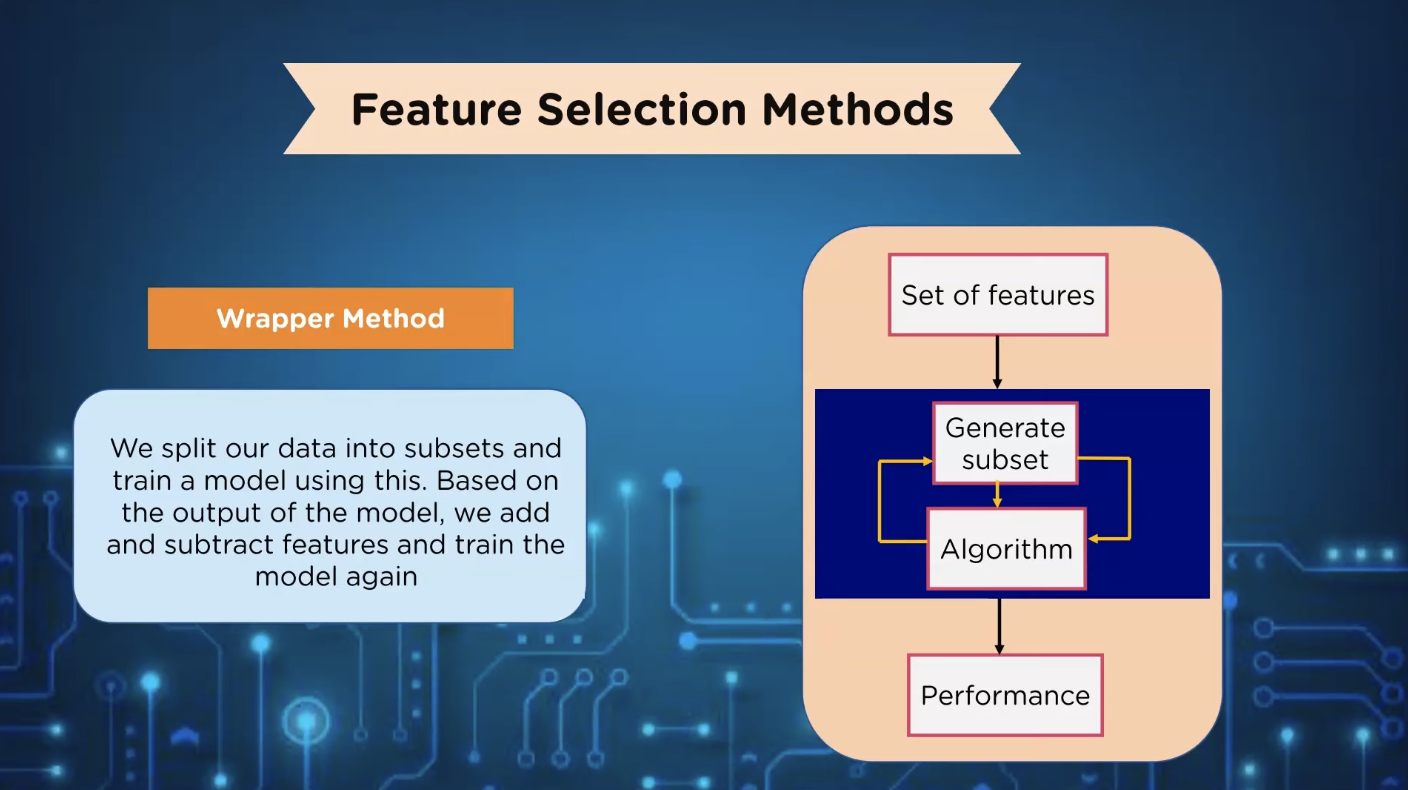

In [153]:
Image('/content/Screenshot 2023-03-24 at 07.04.11.png')

1. First we initialize a our models with a random state of 42 and then initializes a recursive feature elimination with cross-validation (RFECV) object using the RFC estimator. 

2. The RFECV object will iteratively remove the weakest feature(s) until the specified number of features is reached, and cross-validation is performed to evaluate the performance of the model on each subset of features.

3. Finally, the RFECV object is fit on the training data (x_train and y_train) to determine the optimal number of features for the RFC model.

**1a. Recursive feature elimination with cross validation and Decision tree classification**

In [340]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier
clf_dt = DecisionTreeClassifier()

# Perform RFE with 5-fold cross-validation
rfe = RFE(estimator=clf_dt, n_features_to_select=None, step=1)
rfe.fit(x_train_combined, y_train)

print('Optimal number of features :', rfe.n_features_)
print('Best features :', x_train.columns[rfe.support_])


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Optimal number of features : 76
Best features : Index(['Time', 'Number_of_vehicles_involved', 'Number_of_casualties',
       'Day_of_week_Friday', 'Day_of_week_Monday', 'Day_of_week_Saturday',
       'Day_of_week_Sunday', 'Day_of_week_Thursday', 'Day_of_week_Tuesday',
       'Sex_of_driver_Male', 'Sex_of_driver_Unknown',
       'Educational_level_Elementary school', 'Educational_level_Unknown',
       'Educational_level_unknown', 'Vehicle_driver_relation_Other',
       'Vehicle_driver_relation_Owner', 'Vehicle_driver_relation_Unknown',
       'Vehicle_driver_relation_unknown', 'Driving_experience_1-2yr',
       'Driving_experience_Above 10yr', 'Driving_experience_Below 1yr',
       'Driving_experience_unknown', 'Type_of_vehicle_Bicycle',
       'Type_of_vehicle_Lorry', 'Type_of_vehicle_Motorcycle',
       'Type_of_vehicle_Pick up upto 10Q', 'Type_of_vehicle_unknown',
       'Owner_of_vehicle_Governmental', 'Owner_of_vehicle_Organization',
       'Owner_of_vehicle_Owner', 'Owner_of_vehi

**1b. Feature Importance in Decision Tree Classificaiton**

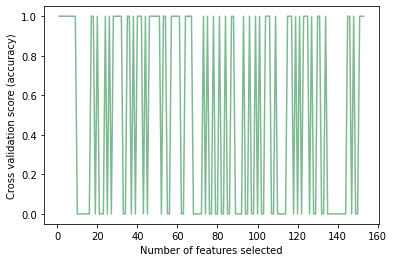

In [351]:
# Plot the accuracy vs number of features
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(range(1, len(rfe.support_) + 1), rfe.support_)
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Feature ranking:
1. feature 150 (0.086981)
2. feature 151 (0.043531)
3. feature 152 (0.038689)
4. feature 3 (0.015952)
5. feature 5 (0.015289)
6. feature 35 (0.015179)
7. feature 41 (0.015008)
8. feature 52 (0.013852)
9. feature 6 (0.013609)
10. feature 4 (0.013461)
11. feature 103 (0.013270)
12. feature 30 (0.012826)
13. feature 17 (0.012648)
14. feature 2 (0.012620)
15. feature 58 (0.012113)
16. feature 29 (0.011985)
17. feature 0 (0.011890)
18. feature 7 (0.011707)
19. feature 31 (0.011500)
20. feature 37 (0.011448)
21. feature 28 (0.010809)
22. feature 1 (0.010430)
23. feature 32 (0.009972)
24. feature 53 (0.009727)
25. feature 40 (0.009706)
26. feature 72 (0.009671)
27. feature 145 (0.009669)
28. feature 87 (0.009564)
29. feature 19 (0.009562)
30. feature 66 (0.009532)
31. feature 144 (0.009385)
32. feature 120 (0.009317)
33. feature 97 (0.009082)
34. feature 80 (0.008974)
35. feature 84 (0.008729)
36. feature 43 (0.008667)
37. feature 59 (0.008612)
38. feature 115 (0.008425)
39. 

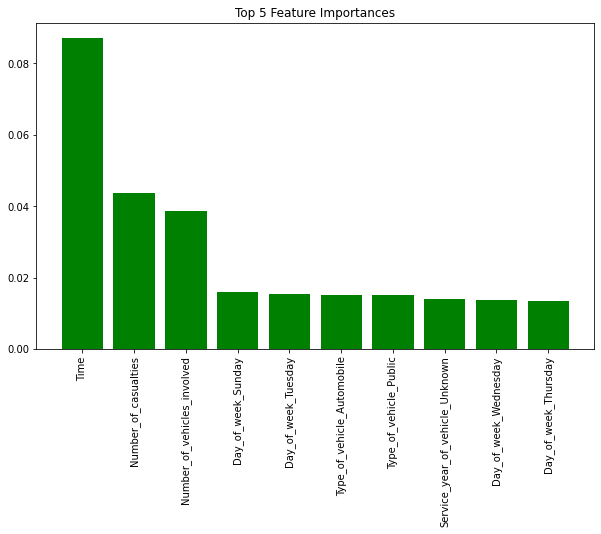

In [168]:
# Create an instance of the DecisionTreeClassifier class
clf_dt = DecisionTreeClassifier()

# Train the decision tree classifier on the combined training set
clr_dt = clf_dt.fit(x_train_combined, y_train)

# Get the feature importances and sort them in descending order
importances = clr_dt.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train_combined.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Get the top 10 important feature indices and their importances
top_indices = indices[:10]
top_importances = importances[top_indices]

# Plot the top 5 important features
plt.figure(1, figsize=(10, 6))
plt.title("Top 5 Feature Importances")
plt.bar(range(len(top_indices)), top_importances, color="g", align="center")
plt.xticks(range(len(top_indices)), x_train_combined.columns[top_indices], rotation=90)
plt.show()

**Observation:**

- Most important Feature is time, the later the time the higher the risk of sever accidents
- Number of casualties involved is also important in determining the severity.
- Day of the week also determines the severity, people are more likely to have high severity accident on sundays and tuesdays compared to other days

**2a. Recursive feature elimination with cross validation and random forest classification**

In [327]:
from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(x_train_combined, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x_train.columns[rfecv.support_])

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Optimal number of features : 3
Best features : Index(['Cause_of_accident_unknown', 'Pedestrian_movement_category_Crossing',
       'Pedestrian_movement_category_Other'],
      dtype='object')


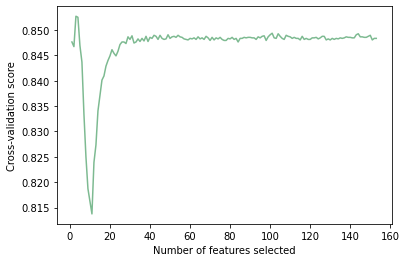

In [335]:
# Plot the cross-validation score vs. number of features
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.show()


**2b. Feature Importance in Random Forest Classificaiton**

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Feature ranking:
1. feature 150 (0.062118)
2. feature 152 (0.038045)
3. feature 151 (0.026942)
4. feature 58 (0.013930)
5. feature 53 (0.013756)
6. feature 35 (0.013558)
7. feature 7 (0.013294)
8. feature 60 (0.013198)
9. feature 72 (0.013196)
10. feature 19 (0.013191)
11. feature 103 (0.013050)
12. feature 52 (0.012707)
13. feature 30 (0.012699)
14. feature 29 (0.012485)
15. feature 66 (0.012395)
16. feature 56 (0.012314)
17. feature 57 (0.012286)
18. feature 37 (0.012122)
19. feature 8 (0.011938)
20. feature 144 (0.011616)
21. feature 0 (0.011332)
22. feature 4 (0.011027)
23. feature 31 (0.010996)
24. feature 87 (0.010926)
25. feature 84 (0.010798)
26. feature 2 (0.010732)
27. feature 6 (0.010599)
28. feature 16 (0.010377)
29. feature 100 (0.010317)


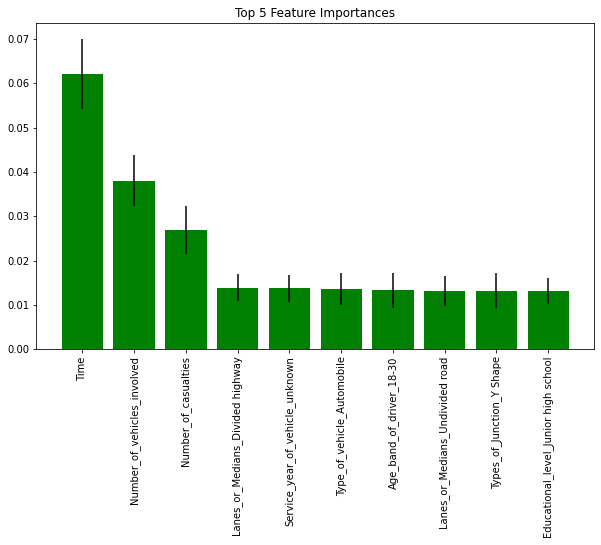

In [167]:

clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(x_train_combined,y_train)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clr_rf_5.estimators_], axis=0)
indices = np.argsort(importances)[::-1]


# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Get the top 10 important feature indices and their importances
top_indices = indices[:10]
top_importances = importances[top_indices]

# Plot the top 10 important features
plt.figure(1, figsize=(10, 6))
plt.title("Top 5 Feature Importances")
plt.bar(range(len(top_indices)), top_importances, color="g", yerr=std[top_indices], align="center")
plt.xticks(range(len(top_indices)), x_train_combined.columns[top_indices], rotation=90)
plt.show()


**Observation:**

- Most important Feature is time, the later the time the higher the risk of sever accidents
- Number of vehicles involved is also important in determining the severity.

**3a. Recursive feature elimination with cross validation and SVC classification**

In [154]:
# Create a Support Vector Classifier
clf_svc = SVC(kernel='linear')

# Perform RFE with 5-fold cross-validation
rfe = RFE(estimator=clf_svc, n_features_to_select=None, step=1)
rfe.fit(x_train_combined, y_train)

# Get the selected feature indices
feature_indices = rfe.support_

# Create a new dataframe with only the selected features
x_train_selected = x_train_combined.iloc[:, feature_indices]

print('Optimal number of features:', rfe.n_features_)
print('Best features:', x_train_selected.columns)


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Optimal number of features: 76
Best features: Index(['Day_of_week_Monday', 'Day_of_week_Saturday', 'Day_of_week_Sunday',
       'Age_band_of_driver_31-50', 'Age_band_of_driver_Under 18',
       'Age_band_of_driver_Unknown', 'Sex_of_driver_Female',
       'Sex_of_driver_Male', 'Sex_of_driver_Unknown',
       'Educational_level_Above high school',
       'Educational_level_Elementary school', 'Educational_level_High school',
       'Educational_level_Junior high school',
       'Educational_level_Writing & reading', 'Educational_level_unknown',
       'Vehicle_driver_relation_Employee', 'Vehicle_driver_relation_Other',
       'Vehicle_driver_relation_Owner', 'Vehicle_driver_relation_Unknown',
       'Driving_experience_1-2yr', 'Driving_experience_No Licence',
       'Owner_of_vehicle_Governmental', 'Owner_of_vehicle_unknown',
       'Service_year_of_vehicle_1-2yr', 'Service_year_of_vehicle_Above 10yr',
       'Service_year_of_vehicle_Below 1yr', 'Defect_of_vehicle_No defect',
       'Def

**3b. Feature Importance in SVC Classificaiton**

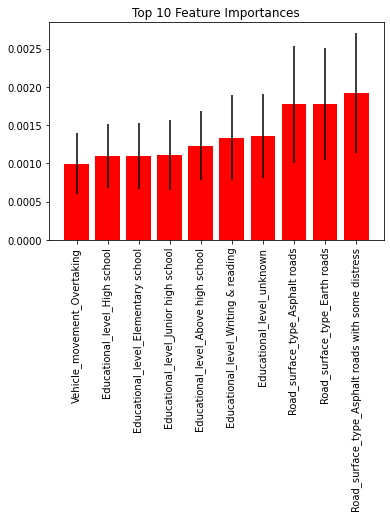

In [155]:
# Plot the feature importances
importances = rfe.estimator_.coef_[0]
std = np.std([coef for coef in rfe.estimator_.coef_], axis=0)
indices = np.argsort(importances)[-10:]

plt.figure()
plt.title("Top 10 Feature Importances")
plt.bar(range(len(indices)), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(len(indices)), x_train_selected.columns[indices], rotation=90)
plt.show()

**Observation:**

- Most important Feature is road type, if road type is asphalt road with distress and contributes the most to the risk of high severity accident
- Followed by other types of road surface.

**4a. Recursive feature elimination with cross validation and Naive Bayes classification**

In [163]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.naive_bayes import GaussianNB

# Create a Naive Bayes classifier
clf_nb = GaussianNB()

# Select top 10 features using ANOVA F-value
selector = SelectKBest(f_classif, k=10)
selector.fit(x_train_combined, y_train)

# Get the selected feature indices
feature_indices = selector.get_support()

# Create a new dataframe with only the selected features
x_train_selected = x_train_combined.iloc[:, feature_indices]

print('Best features:', x_train_selected.columns)


Best features: Index(['Age_band_of_driver_Under 18', 'Age_band_of_driver_Unknown',
       'Types_of_Junction_Crossing', 'Types_of_Junction_No junction',
       'Light_conditions_Darkness - no lighting',
       'Type_of_collision_Pedestrian collision', 'Vehicle_movement_Overtaking',
       'Cause_of_accident_Traffic rules violation', 'Number_of_casualties',
       'Number_of_vehicles_involved'],
      dtype='object')


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Note:  Naive Bayes is a probabilistic classifier and `doesn't have a feature selection method like RFE`. Instead, we can use ANOVA F-value to select the top k features that have the strongest correlation with the target variable.

**4b. ANOVA F-values for each feature in Naive Bayes Classificaiton**

In [169]:
# Create a Naive Bayes classifier
clf_nb = GaussianNB()

# Select top 10 features using ANOVA F-value
selector = SelectKBest(f_classif, k=10)
selector.fit(x_train_combined, y_train)

# Print ANOVA F-values for each feature
print('ANOVA F-values:', selector.scores_)

# Get the selected feature indices
feature_indices = selector.get_support()

# Create a new dataframe with only the selected features
x_train_selected = x_train_combined.iloc[:, feature_indices]

print('Best features:', x_train_selected.columns)

ANOVA F-values: [4.81284658e+00 5.08340965e+00 5.43788075e+00 3.67573850e+00
 4.81657802e-01 2.65349467e-01 3.09799049e-01 3.21997022e-01
 4.63336162e+00 5.13830006e+00 1.07722754e+01 1.09563094e+01
 2.93191979e+00 3.63406274e+00 2.22174226e+00 4.68993537e-01
 1.34641701e-01 5.89529059e-02 2.37294894e-01 8.10464177e-02
 1.36115259e+00 2.01578762e-01 1.86306899e+00 1.62422545e+00
 3.99718621e-01 1.35097279e+00 2.45550941e-01 5.70883811e-01
 5.27823785e-01 3.32338121e+00 4.36742952e-01 2.76975622e-01
 2.39625551e+00 6.09081970e-01 1.02169210e+00 2.85174889e-01
 1.62065120e+00 6.00513074e-01 7.04908311e-01 1.95407369e+00
 3.72671079e+00 4.76908186e-02 1.31538464e+00 1.05808955e+00
 1.45954239e+00 1.05445171e+00 2.19237521e-02 3.97190316e-01
 1.11488311e+00 9.57084266e-02 2.33454537e+00 1.29588310e+00
 3.04584260e-01 1.83216738e-01 6.10721967e-01 1.22533900e+00
 5.15287699e-01 6.65912278e-01 1.25149427e+00 9.42597731e-01
 1.71205716e+00 3.97210062e-01 1.56714904e-01 4.22929823e-01
 1.32205

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


## 7. Model Definition 📖

###A. Model Assumptions


**Decision Tree:**

- Assumes that the feature values are independent of each other.
- Assumes that the dataset is correctly labeled and there is no noise in the data.
- Assumes that the tree is not overfitting to the training data.

**Random Forest:**

- Assumes that the feature values are independent of each other.
- Assumes that the dataset is correctly labeled and there is no noise in the data.
- Assumes that the individual trees in the forest are not overfitting to the training data.
- Assumes that the features have a non-zero impact on the target variable.

**Naive Bayes:**

- Assumes that the features are conditionally independent given the target variable.
- Assumes that the feature values are categorical or can be transformed to categorical.
- Assumes that the prior probabilities of each class are known or can be estimated.

**SVM:**

- Assumes that the data is linearly separable or can be transformed to a higher dimension.
- Assumes that the feature values are normalized and have the same scale.
- Assumes that the margin between the classes is maximized.
- Assumes that the kernel function is appropriate for the data.

**Our Actions**
1. Data Cleaning: Removing Duplicates, Missing values ✅
2. VIF test for multicolinearity ✅
3. Feature Engineering: Scaling and encoding ✅

### B. Model Evaluation Metrics

When comparing models that will be used in the medical/rescue field for predicting a particular outcome, such as survival diagnosis or `severity diagnosis`, it is important to choose the evaluation metric that is most appropriate for the specific problem and the associated costs of making a false positive or false negative prediction.

`Recall` is a good metric to use in this case where the `cost of a false negative is high.`

**Why?**

False negatives are more costly as they may lead to `missed opportunities to prevent accidents or take appropriate measures to save the victim of the accident.`

###C. Model Definition

**Decision Tree:**

- What it is: A decision tree is a model used in supervised learning that creates a tree-like graph of decisions and their possible consequences.

- How does it work:  The model is built by recursively splitting the data into subsets based on the most significant variable, and each subset is further split into more subsets until a stopping criterion is met.

- Input:  The input to a decision tree algorithm is a labeled dataset consisting of features (input variables) and corresponding class labels (output variable).

**Random Forest:**
- What it is: Random Forest is a machine learning algorithm used for classification and regression tasks. It is an ensemble learning method that combines multiple decision trees and aggregates their outputs to make the final prediction. 

- How does it work:   The algorithm works by building multiple decision trees using different subsets of the training data and randomly selected subsets of features.

- Input:  The input to a random forest algorithm is a labeled dataset consisting of features (input variables) and corresponding class labels (output variable).

**Suport Vector Machine:**

- What it is: Support Vector Machine (SVM) is a classification algorithm that works by finding the best possible line or hyperplane that can separate the two classes in a high-dimensional space.

- How does it work:    The SVM algorithm takes a labeled dataset and tries to find the best hyperplane that can maximize the margin between the two classes. 

- Input:  The input to an SVM algorithm is a labeled dataset consisting of features (input variables) and corresponding class labels (output variable).

**Naive Bayes:**

- What it is: Naive Bayes is a classification algorithm that is based on the Bayes' theorem of probability.

- How does it work: It works by calculating the probability of each class given the input features and selecting the class with the highest probability as the predicted class. Naive Bayes is a simple and efficient algorithm that works well with high-dimensional datasets.

- Input:  The input to a Naive Bayes algorithm is a labeled dataset consisting of features (input variables) and corresponding class labels (output variable).




## 8. Model Training and Evaluation

### 1.Applying SMOTE to Imbalanced Dataset

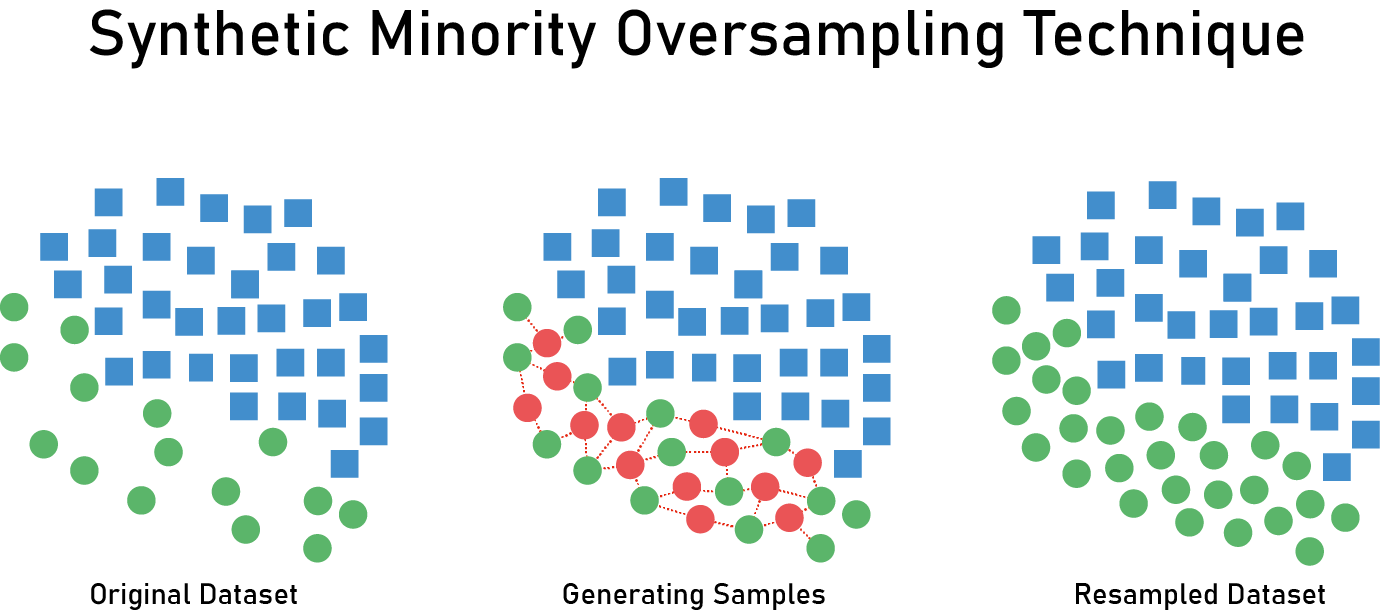

In [170]:
Image('/content/1_GJY7UnJ4WCzqgtrfkCvkdA.png')

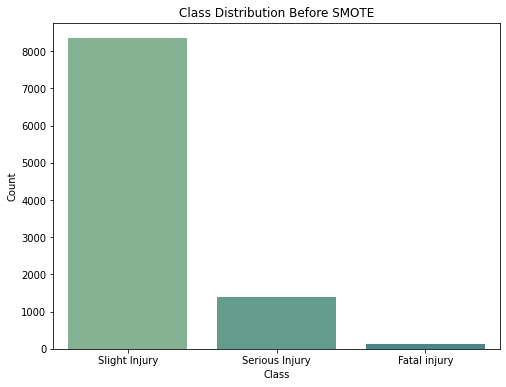

In [171]:
# Visualize the countplot of y_train before SMOTE
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train)
plt.title("Class Distribution Before SMOTE")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

1. Apply SMOTE to `Fatal Injury`

In [183]:
smote = SMOTE(sampling_strategy='minority')
x_train_resampled, y_train_resampled = smote.fit_resample(x_train_combined, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Visualizing distribution after SMOTE to `Fatal Injury`

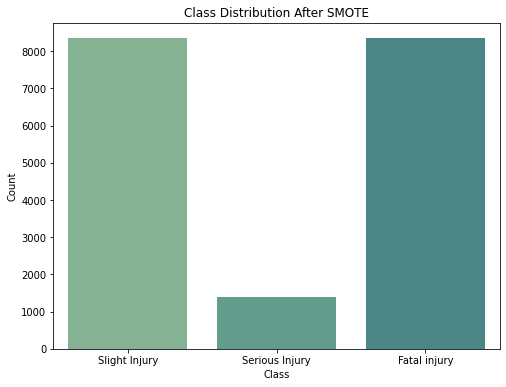

In [184]:
# Visualize the countplot of y_train after SMOTE
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train_resampled)
plt.title("Class Distribution After SMOTE")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

2. Apply SMOTE to `Serious Injury`

In [186]:
smote = SMOTE(sampling_strategy='minority')
x_train_resampled, y_train_resampled = smote.fit_resample(x_train_resampled, y_train_resampled)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Visualizing distribution after SMOTE to `Serious Injury`

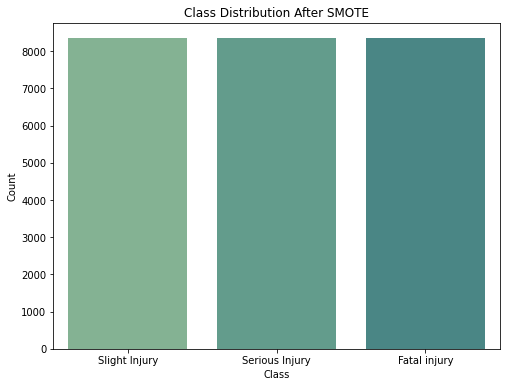

In [187]:
# Visualize the countplot of y_train after SMOTE
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train_resampled)
plt.title("Class Distribution After SMOTE")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

**Observation:**

As you can see all the 3 target variables now are all balanceed with each target variable containing `8000 rows of data`

### 2. Training the Models

We train the models with the balanced train set: `x_train_resampled, y_train_resampled `

In [189]:
x_train_resampled.head(1)

,Day_of_week_Friday,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,Age_band_of_driver_18-30,Age_band_of_driver_31-50,Age_band_of_driver_Over 51,Age_band_of_driver_Under 18,Age_band_of_driver_Unknown,Sex_of_driver_Female,Sex_of_driver_Male,Sex_of_driver_Unknown,Educational_level_Above high school,Educational_level_Elementary school,Educational_level_High school,Educational_level_Illiterate,Educational_level_Junior high school,Educational_level_Unknown,Educational_level_Writing & reading,Educational_level_unknown,Vehicle_driver_relation_Employee,Vehicle_driver_relation_Other,Vehicle_driver_relation_Owner,Vehicle_driver_relation_Unknown,Vehicle_driver_relation_unknown,Driving_experience_1-2yr,Driving_experience_2-5yr,Driving_experience_5-10yr,Driving_experience_Above 10yr,Driving_experience_Below 1yr,Driving_experience_No Licence,Driving_experience_unknown,Type_of_vehicle_Automobile,Type_of_vehicle_Bicycle,Type_of_vehicle_Lorry,Type_of_vehicle_Motorcycle,Type_of_vehicle_Other,Type_of_vehicle_Pick up upto 10Q,Type_of_vehicle_Public,Type_of_vehicle_unknown,Owner_of_vehicle_Governmental,Owner_of_vehicle_Organization,Owner_of_vehicle_Owner,Owner_of_vehicle_unknown,Service_year_of_vehicle_1-2yr,Service_year_of_vehicle_2-5yrs,Service_year_of_vehicle_5-10yrs,Service_year_of_vehicle_Above 10yr,Service_year_of_vehicle_Below 1yr,Service_year_of_vehicle_Unknown,Service_year_of_vehicle_unknown,Defect_of_vehicle_5,Defect_of_vehicle_7,Defect_of_vehicle_No defect,Defect_of_vehicle_unknown,Lanes_or_Medians_Divided highway,Lanes_or_Medians_Other,Lanes_or_Medians_Undivided road,Lanes_or_Medians_unknown,Road_allignment_Flat terrain tangent road,Road_allignment_Mountainous terrain tangent road,Road_allignment_unknown,Types_of_Junction_Crossing,Types_of_Junction_No junction,Types_of_Junction_O Shape,Types_of_Junction_Other,Types_of_Junction_T Shape,Types_of_Junction_Unknown,Types_of_Junction_X Shape,Types_of_Junction_Y Shape,Types_of_Junction_unknown,Road_surface_type_Asphalt roads,Road_surface_type_Asphalt roads with some distress,Road_surface_type_Earth roads,Road_surface_type_Gravel roads,Road_surface_type_Other,Road_surface_type_unknown,Road_surface_conditions_Dry,Road_surface_conditions_Flood,Road_surface_conditions_Snow,Road_surface_conditions_Wet or damp,Light_conditions_Darkness - lights lit,Light_conditions_Darkness - lights unlit,Light_conditions_Darkness - no lighting,Light_conditions_Daylight,Weather_conditions_Cloudy,Weather_conditions_Fog or mist,Weather_conditions_Normal,Weather_conditions_Other,Weather_conditions_Raining,Weather_conditions_Raining and Windy,Weather_conditions_Snow,Weather_conditions_Unknown,Weather_conditions_Windy,Type_of_collision_Collision with roadside,Type_of_collision_Pedestrian collision,Type_of_collision_Train collision,Type_of_collision_unknown,Vehicle_movement_Entering a junction,Vehicle_movement_Getting off,Vehicle_movement_Going straight,Vehicle_movement_Moving Backward,Vehicle_movement_Other,Vehicle_movement_Overtaking,Vehicle_movement_Parked,Vehicle_movement_Reversing,Vehicle_movement_Stopping,Vehicle_movement_Turnover,Vehicle_movement_U-Turn,Vehicle_movement_Unknown,Vehicle_movement_Waiting to go,Vehicle_movement_unknown,Casualty_class_Driver or rider,Casualty_class_Passenger,Casualty_class_Pedestrian,Casualty_class_na,Sex_of_casualty_Female,Sex_of_casualty_Male,Sex_of_casualty_na,Age_band_of_casualty_18-30,Age_band_of_casualty_31-50,Age_band_of_casualty_5,Age_band_of_casualty_Over 51,Age_band_of_casualty_Under 18,Age_band_of_casualty_na,Casualty_severity_1,Casualty_severity_2,Casualty_severity_3,Casualty_severity_na,Pedestrian_movement_Crossing from driver's nearside,Pedestrian_movement_Crossing from nearside - masked by parked or statioNot a Pedestrianry vehicle,Pedestrian_movement_Crossing from offside - masked by parked or statioNot a Pedestrianry vehicle,"Pedestrian_movement_In carriageway, statioNot a Pedestrianry - not cro

In [190]:
x_train_resampled.shape

(25053, 153)

**1. Decision Tree**

In [198]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(x_train_resampled, y_train_resampled)

y_pred_train = tree_clf.predict(x_train_resampled)
y_pred_test = tree_clf.predict(x_test_combined)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [200]:
print("============ Training Set Metrics:============ ")
print(classification_report(y_train_resampled, y_pred_train))

print('\n')

print(" ============ Test Set Metrics: ===========")
print(classification_report(y_test, y_pred_test))

============ Training Set Metrics:============ 
                precision    recall  f1-score   support

  Fatal injury       1.00      1.00      1.00      8351
Serious Injury       1.00      1.00      1.00      8351
 Slight Injury       1.00      1.00      1.00      8351

      accuracy                           1.00     25053
     macro avg       1.00      1.00      1.00     25053
  weighted avg       1.00      1.00      1.00     25053



 ============ Test Set Metrics: ===========
                precision    recall  f1-score   support

  Fatal injury       0.15      0.14      0.14        37
Serious Injury       0.20      0.23      0.21       363
 Slight Injury       0.85      0.83      0.84      2064

      accuracy                           0.73      2464
     macro avg       0.40      0.40      0.40      2464
  weighted avg       0.74      0.73      0.74      2464



[[   5    8   24]
 [   3   84  276]
 [  26  327 1711]]


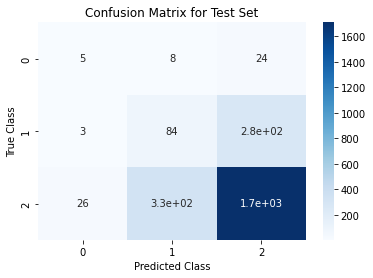

In [202]:
cm = confusion_matrix(y_test, y_pred_test)
print(cm)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix for Test Set')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

**Model Analysis: 🧙**

- The decision tree model achieved perfect accuracy on the training set, with an f1-score of 1 for each class.
- However, on the test set, the model's performance significantly decreased, with an overall accuracy of 0.73.
- The precision and recall for the "Fatal injury" and "Serious injury" classes were quite low, with only 0.15 and 0.20 precision, respectively.
- The model performed much better on the "Slight injury" class, with a precision and recall of 0.85 and 0.83, respectively.
- The confusion matrix shows that the model was particularly bad at predicting the "Fatal injury" class, with only 5 out of 37 cases correctly predicted.

Overall, the decision tree model seems to be `overfitting on the training set`, leading to poor generalization on the test set.

**2. Random Forest**

In [203]:
rf_clf = RandomForestClassifier()
rf_clf.fit(x_train_resampled, y_train_resampled)

y_pred_train = rf_clf.predict(x_train_resampled)
y_pred_test = rf_clf.predict(x_test_combined)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [204]:
print("============ Training Set Metrics:============ ")
print(classification_report(y_train_resampled, y_pred_train))

print('\n')

print(" ============ Test Set Metrics: ===========")
print(classification_report(y_test, y_pred_test))

                precision    recall  f1-score   support

  Fatal injury       1.00      1.00      1.00      8351
Serious Injury       1.00      1.00      1.00      8351
 Slight Injury       1.00      1.00      1.00      8351

      accuracy                           1.00     25053
     macro avg       1.00      1.00      1.00     25053
  weighted avg       1.00      1.00      1.00     25053



 ============ Test Set Metrics: ===========
                precision    recall  f1-score   support

  Fatal injury       0.00      0.00      0.00        37
Serious Injury       0.75      0.01      0.02       363
 Slight Injury       0.84      1.00      0.91      2064

      accuracy                           0.84      2464
     macro avg       0.53      0.34      0.31      2464
  weighted avg       0.81      0.84      0.77      2464



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[   0    0   37]
 [   0    3  360]
 [   0    1 2063]]


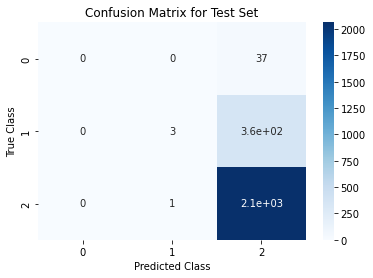

In [205]:
cm = confusion_matrix(y_test, y_pred_test)
print(cm)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix for Test Set')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

**Model Analysis: 🧙**

- The random forest model achieved a training set accuracy of 100%, indicating that it was able to perfectly predict the target variable for the training data. 
- However, the model performed poorly on the test set, achieving an accuracy of only 84%. This suggests that the model may have overfit to the training data, failing to generalize well to unseen data. 
- The precision and recall for the 'Fatal Injury' and 'Serious Injury' classes were low, with the model struggling to correctly classify these classes. On the other hand, the model had high precision and recall for the 'Slight Injury' class, achieving an F1-score of 0.91. 
- The confusion matrix also shows that the model predicted all instances in the 'Fatal Injury' class to be 'Slight Injury', which is a concerning finding.

**3. Support Vector Machine**

In [206]:
svm_clf = SVC(kernel='rbf', class_weight='balanced')
svm_clf.fit(x_train_resampled, y_train_resampled)

y_pred_train = svm_clf.predict(x_train_resampled)
y_pred_test = svm_clf.predict(x_test_combined)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [207]:
print("============ Training Set Metrics:============ ")
print(classification_report(y_train_resampled, y_pred_train))

print('\n')

print(" ============ Test Set Metrics: ===========")
print(classification_report(y_test, y_pred_test))

============ Training Set Metrics:============ 
                precision    recall  f1-score   support

  Fatal injury       1.00      1.00      1.00      8351
Serious Injury       0.99      0.87      0.92      8351
 Slight Injury       0.88      0.99      0.93      8351

      accuracy                           0.95     25053
     macro avg       0.96      0.95      0.95     25053
  weighted avg       0.96      0.95      0.95     25053



 ============ Test Set Metrics: ===========
                precision    recall  f1-score   support

  Fatal injury       0.55      0.16      0.25        37
Serious Injury       0.47      0.07      0.13       363
 Slight Injury       0.85      0.98      0.91      2064

      accuracy                           0.84      2464
     macro avg       0.62      0.41      0.43      2464
  weighted avg       0.79      0.84      0.78      2464



[[   6    1   30]
 [   0   27  336]
 [   5   30 2029]]


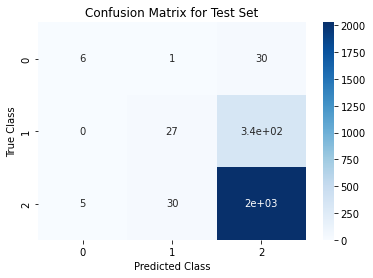

In [208]:
cm = confusion_matrix(y_test, y_pred_test)
print(cm)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix for Test Set')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

**Model Analysis: 🧙**

- The SVM model performed well on the training set with high precision, recall, and f1-score for all classes.
- However, on the test set, the model's performance was poorer with low precision, recall, and f1-score for Fatal and Serious Injury classes.
- The model's accuracy on the test set was 0.84, which is lower than the accuracy on the training set.
- The confusion matrix shows that the model is misclassifying a significant number of Fatal and Serious Injury cases as Slight Injury cases.
- The model is correctly classifying the majority of Slight Injury cases.

**4. Naive Bayes**

In [209]:
#Instantiate the Naive Bayes classifier
nb_clf = GaussianNB()

#Fit the model on the resampled training data
nb_clf.fit(x_train_resampled, y_train_resampled)

#Predict on the training and test sets
y_pred_train = nb_clf.predict(x_train_resampled)
y_pred_test = nb_clf.predict(x_test_combined)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [210]:
print("============ Training Set Metrics:============ ")
print(classification_report(y_train_resampled, y_pred_train))

print('\n')

print(" ============ Test Set Metrics: ===========")
print(classification_report(y_test, y_pred_test))

                precision    recall  f1-score   support

  Fatal injury       0.40      1.00      0.57      8351
Serious Injury       0.61      0.21      0.31      8351
 Slight Injury       0.73      0.10      0.18      8351

      accuracy                           0.44     25053
     macro avg       0.58      0.44      0.35     25053
  weighted avg       0.58      0.44      0.35     25053



 ============ Test Set Metrics: ===========
                precision    recall  f1-score   support

  Fatal injury       0.02      0.76      0.03        37
Serious Injury       0.14      0.14      0.14       363
 Slight Injury       0.87      0.11      0.19      2064

      accuracy                           0.12      2464
     macro avg       0.34      0.33      0.12      2464
  weighted avg       0.75      0.12      0.18      2464



[[  28    6    3]
 [ 281   51   31]
 [1539  307  218]]


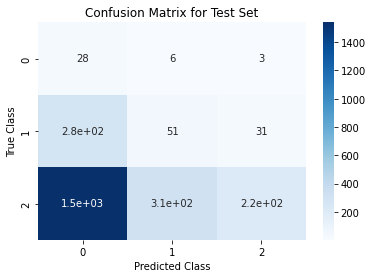

In [211]:
cm = confusion_matrix(y_test, y_pred_test)
print(cm)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix for Test Set')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

**Model Analysis: 🧙**

- The Naive Bayes model had low precision, recall, and f1-score for all classes on both the training and test sets.
- The Naive Bayes model had high bias towards predicting Fatal and Slight Injury cases.

## 9. Cross Validation 🎌

Cross-validation is a model validation technique used to evaluate the performance of a machine learning model. 

It involves partitioning the original dataset into multiple subsets, training the model on some of the subsets, and evaluating it on the remaining subset.

In [214]:
# Define models to cross-validate
models = [SVC(), GaussianNB(), DecisionTreeClassifier(), RandomForestClassifier(), AdaBoostClassifier()]

# Define k-fold cross-validation object
kfold = StratifiedKFold(n_splits=5)

In [222]:
# Initialize arrays to store cross-validation results
mean_recall_scores = np.zeros(len(models))
std_recall_scores = np.zeros(len(models))


In [223]:
# Perform cross-validation and record results
for i, model in enumerate(models):
    recall_scores = cross_val_score(model, x_train_resampled, y_train_resampled, cv=kfold, scoring='recall_macro')
    mean_recall_scores[i] = np.mean(recall_scores)
    std_recall_scores[i] = np.std(recall_scores)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/uti

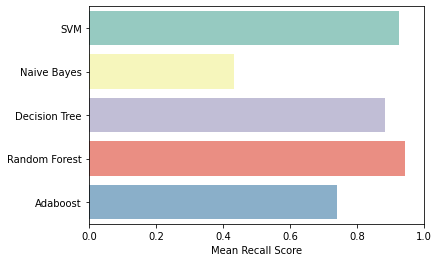

In [225]:
# Plot mean recall scores and standard deviations
sns.set_palette('Set3')
sns.barplot(x=mean_recall_scores, y=['SVM', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'Adaboost'], orient='h')
plt.xlabel('Mean Recall Score')
plt.xlim([0, 1])
plt.show()

**Observation:**

When seeing the mean recall score for the train set we can see that random forest performs the best, followed by svm and then Adaboost.

In [226]:
# Perform cross-validation and record results
for i, model in enumerate(models):
    recall_scores = cross_val_score(model, x_test_combined, y_test, cv=kfold, scoring='recall_macro')
    mean_recall_scores[i] = np.mean(recall_scores)
    std_recall_scores[i] = np.std(recall_scores)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/uti

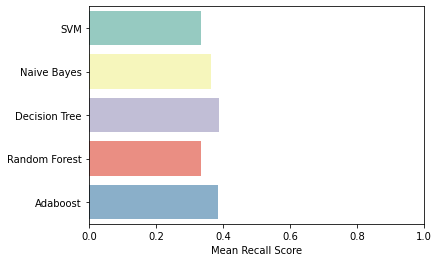

In [228]:
# Plot mean recall scores and standard deviations
sns.set_palette('Set3')
sns.barplot(x=mean_recall_scores, y=['SVM', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'Adaboost'], orient='h')
plt.xlabel('Mean Recall Score')
plt.xlim([0, 1])
plt.show()

**Observation:**
When seeing the mean recall score for the test set we can see that decision tree performs the best with a score of `0.39`, followed by adaboost and naive bayes

In [229]:
# Print the highest score and corresponding model name
highest_score = np.max(mean_recall_scores)
highest_index = np.argmax(mean_recall_scores)
highest_model = models[highest_index]
print(f'The highest score is {highest_score:.2f} and the corresponding model is {highest_model}.')

The highest score is 0.39 and the corresponding model is DecisionTreeClassifier().


**Cross Validation Conclusion:**

## 10. Hyperparameter Tuning using Pipeline 📐

Hyperparameter tuning is the process of selecting the optimal combination of hyperparameters for a machine learning model to achieve the best performance on a given task. 

It involves adjusting the values of model parameters that are not learned during training, but rather are set before training begins.

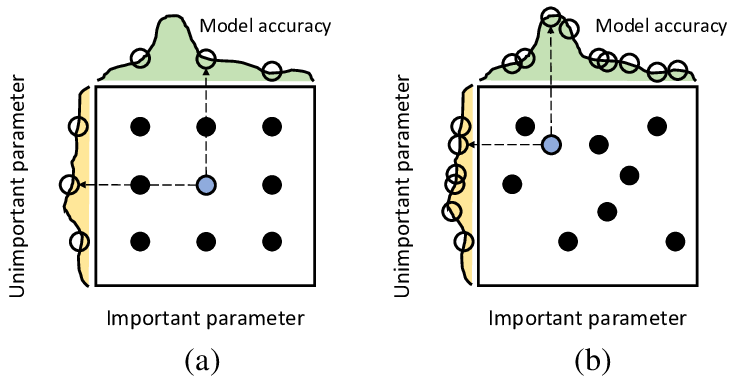

In [234]:
Image('/content/Comparison-between-a-grid-search-and-b-random-search-for-hyper-parameter-tuning-The.png')

### 1.Fitting Hyper Parameter using pipeline

In [230]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [246]:
# Define the pipeline
tree_pipe = Pipeline([
    ('classifier', DecisionTreeClassifier())
])

In [247]:
tree_pipe

Pipeline(steps=[('classifier', DecisionTreeClassifier())])

First we define the parameter grid for the decision_tree classfier.

The parameter grid specifies different values for various hyperparameters of the decision_tree classifier, and the purpose of this grid is to search for the best combination of hyperparameters that produces the highest performance on a given dataset.

In [249]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'classifier__max_depth': [None, 5, 10],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__max_features': [None, 'sqrt', 'log2']
}

In [248]:
# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'classifier__max_depth': [None, 5, 10, 15, 20, 25, 30, 35, 40],
    'classifier__min_samples_split': [2, 5, 10, 15, 20, 25, 30, 35, 40],
    'classifier__min_samples_leaf': [1, 2, 4, 8, 16, 32],
    'classifier__max_features': [None, 'sqrt', 'log2']
}


Defining scoring metric, refer to model definition to know why we use recall compared to other model metrics.

In [253]:
from sklearn.metrics import make_scorer
from sklearn.metrics import recall_score

In [254]:
# Define the scoring metric
scoring_metric = make_scorer(recall_score, average='macro')

In [255]:
# Perform hyperparameter tuning using GridSearchCV
tree_grid = GridSearchCV(tree_pipe, param_grid=param_grid, scoring=scoring_metric, cv=5, n_jobs=-1)
tree_grid.fit(x_train_resampled, y_train_resampled)

# Perform hyperparameter tuning using RandomizedSearchCV
tree_rand = RandomizedSearchCV(tree_pipe, param_distributions=param_dist, scoring=scoring_metric, cv=5, n_iter=10, n_jobs=-1)
tree_rand.fit(x_train_resampled, y_train_resampled)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('classifier',
                                              DecisionTreeClassifier())]),
                   n_jobs=-1,
                   param_distributions={'classifier__max_depth': [None, 5, 10,
                                                                  15, 20, 25,
                                                                  30, 35, 40],
                                        'classifier__max_features': [None,
                                                                     'sqrt',
                                                                     'log2'],
                                        'classifier__min_samples_leaf': [1, 2,
                                                                         4, 8,
                                                                         16,
                                                                         32],
                                        'classifier__min_samples_split': [2, 5,
                                                                          10,
                                                                          15,
                                                                          20,
                                                                          25,
                                                                          30,
                                                                          35,
                                                                          40]},
                   scoring=make_scorer(recall_score, average=macro))

### 2. Evaluating Hyper Parameter

Printing the best parameter and score

In [256]:
print("GridSearchCV best params:", tree_grid.best_params_)
print("GridSearchCV best score:", tree_grid.best_score_)

# Print the results of RandomizedSearchCV
print("RandomizedSearchCV best params:", tree_rand.best_params_)
print("RandomizedSearchCV best score:", tree_rand.best_score_)


GridSearchCV best params: {'classifier__max_depth': None, 'classifier__max_features': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}
GridSearchCV best score: 0.8846349431597608
RandomizedSearchCV best params: {'classifier__min_samples_split': 35, 'classifier__min_samples_leaf': 2, 'classifier__max_features': None, 'classifier__max_depth': 15}
RandomizedSearchCV best score: 0.8643216499377069


Visualizing the best parameter and score

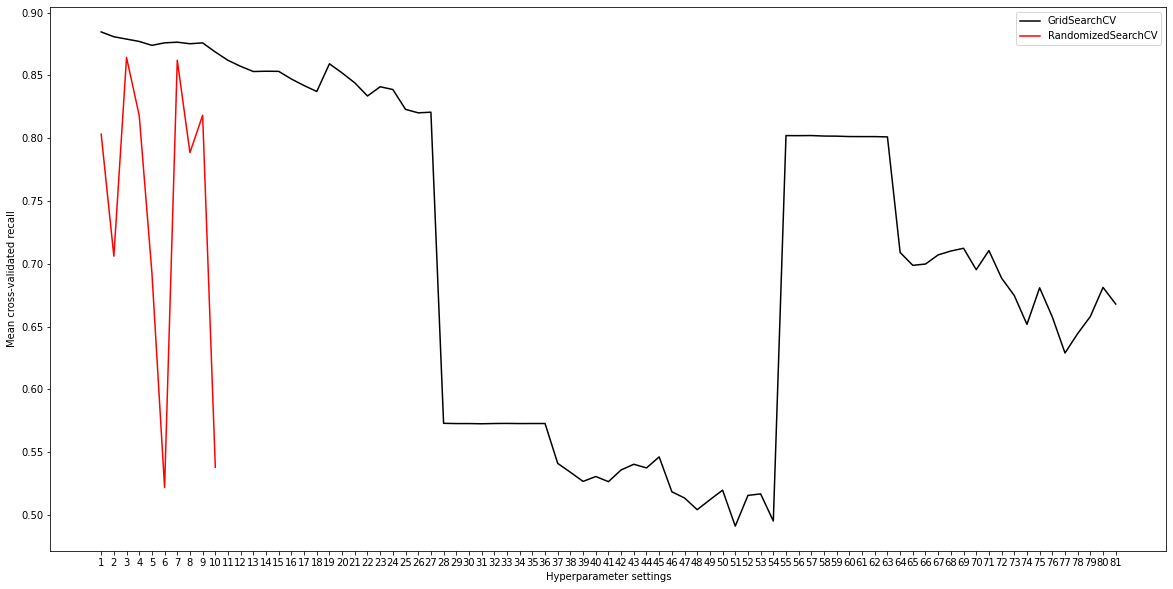

In [259]:
grid_scores = tree_grid.cv_results_['mean_test_score']
rand_scores = tree_rand.cv_results_['mean_test_score']

plt.figure(figsize=(20, 10))
plt.plot(np.arange(len(grid_scores)), grid_scores, label='GridSearchCV', color='black')
plt.plot(np.arange(len(rand_scores)), rand_scores, label='RandomizedSearchCV', color='red')
plt.xticks(np.arange(len(grid_scores)), np.arange(len(grid_scores)) + 1)
plt.xlabel('Hyperparameter settings')
plt.ylabel('Mean cross-validated recall')
plt.legend()
plt.show()


### 3. Fitting Decision Tree with the best parameters

In [263]:
tree_clf_final = DecisionTreeClassifier()
tree_clf_final.set_params(max_depth=None, 
                          max_features=None,
                          min_samples_leaf=1,
                          min_samples_split=2)

tree_clf_final.fit(x_train_resampled, y_train_resampled)

y_pred_train = tree_clf_final.predict(x_train_resampled)
y_pred_test = tree_clf_final.predict(x_test_combined)


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [264]:
print("============ Training Set Metrics:============ ")
print(classification_report(y_train_resampled, y_pred_train))

print('\n')

print(" ============ Test Set Metrics: ===========")
print(classification_report(y_test, y_pred_test))

============ Training Set Metrics:============ 
                precision    recall  f1-score   support

  Fatal injury       1.00      1.00      1.00      8351
Serious Injury       1.00      1.00      1.00      8351
 Slight Injury       1.00      1.00      1.00      8351

      accuracy                           1.00     25053
     macro avg       1.00      1.00      1.00     25053
  weighted avg       1.00      1.00      1.00     25053



 ============ Test Set Metrics: ===========
                precision    recall  f1-score   support

  Fatal injury       0.15      0.14      0.14        37
Serious Injury       0.21      0.26      0.23       363
 Slight Injury       0.85      0.83      0.84      2064

      accuracy                           0.73      2464
     macro avg       0.41      0.41      0.40      2464
  weighted avg       0.75      0.73      0.74      2464



[[   5    8   24]
 [   3   93  267]
 [  26  332 1706]]


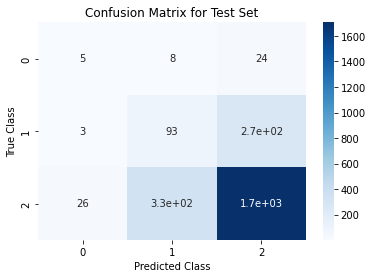

In [265]:
cm = confusion_matrix(y_test, y_pred_test)
print(cm)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix for Test Set')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

### 4. Hyperparameter tuning Evaluation

- The precision, recall, and F1-score of all classes in the training set are perfect, which indicates that the model is overfitting the training set.
- Before hyperparameter tuning, the model's performance on the test set is relatively poor compared to the training set, with an accuracy of 0.73, and the - F1-score for the "Fatal injury" class is very low.
- After hyperparameter tuning, there is a `slight  improvement` in the model's performance on the test set compared to before hyperparameter tuning.

##11.  Overall Technical Analysis 🏞





### 2.Decision Tree
A. Strengths: 💪
- Decision trees are easy to understand and interpret, making them useful for explaining the reasoning behind classification or prediction decisions.
- Decision trees can handle both numerical and categorical data, as well as missing data.
- Decision trees can handle high-dimensional datasets, as they only consider a subset of features at each node.
- Decision trees can capture nonlinear relationships between features.
- Decision trees can be used for both classification and regression problems.

B. Weaknesses: 🔰
- Decision trees are prone to overfitting if the tree is too deep or the minimum number of samples per leaf is too small.
- Decision trees are sensitive to small perturbations in the data, which can lead to different trees being generated.
- Decision trees can be biased if the data used to build the tree is biased.
- Decision trees can be unstable, as small changes in the data can result in a completely different tree being generated.
- Decision trees can have high variance, which means they can perform well on the training set but poorly on the test set.


---
### 3.Cross Validation Conclusion 🔖

- When seeing the mean recall score for the train set we can see that random forest performs the best, followed by svm and then Adaboost.

- When seeing the mean recall score for the test set we can see that decision tree performs the best with a score of `0.39`, followed by adaboost and naive bayes

---

### 4.Hyperparameter Tuning Conclusion 🔖
- The precision, recall, and F1-score of all classes in the training set are perfect, which indicates that the model is overfitting the training set.
- Before hyperparameter tuning, the model's performance on the test set is relatively poor compared to the training set, with an accuracy of 0.73, and the - F1-score for the "Fatal injury" class is very low.
- After hyperparameter tuning, there is a `slight  improvement` in the model's performance on the test set compared to before hyperparameter tuning.


1. Grid Search Best Recall Score:  0.8846349431597608

2. Random Search Best Recall Score: 0.8643216499377069

Best Parameters:  {'classifier__max_depth': None, 'classifier__max_features': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}

---

### 5.Further Improvement 📈

- Feature engineering: consider creating new features or transforming existing ones to better capture the underlying patterns in the data.
- Model selection: try out other ensemble methods or classification models to see if they can improve performance.
- Data augmentation: explore techniques such as oversampling or data synthesis to increase the size and diversity of the training set.
- Regularization: experiment with different types of regularization, such as L1 or L2 regularization, to prevent overfitting.
- Ensemble methods: consider combining different models or using advanced ensemble techniques such as stacking or boosting to further improve performance.
- Hyperparameter tuning: continue to refine the hyperparameters of the model to find the optimal configuration.
- Error analysis: examine the types of errors made by the model to identify patterns or areas of weakness, and adjust the model accordingly.


##11b.  Overall Business Analysis 🏞




**1. Can it be deployed? is the score enough?**

- Unfortunately the score isnt enough and can still be improved by some steps you can see in the overall technical analysis.

- In terms of whether the model can be used in the real field, it would likely require further development and testing to ensure accuracy and reliability. Additionally, the model may need to be integrated with existing systems and workflows to ensure seamless implementation.

**2. Business Benefits the model brings:**

The model can bring the following benefits to the business:

- Improved road safety can lead to fewer accidents and injuries, which can `reduce the costs of emergency services and healthcare`. This can help to improve the financial stability of Jasamarga by `reducing the amount spent on insurance claims and compensations`.
- By improving road safety, `Jasamarga can attract more customers, particularly those who are safety-conscious`. This can help to increase revenue and market share over time.
- Improved road safety can `enhance the reputation` of Jasamarga as a `responsible and safety-focused company`. This can help to build trust with customers, stakeholders, and the public at large, potentially `enhancing brand value and increasing customer loyalty`.
- With the ability to accurately predict accident severity, Jasamarga can improve its emergency response services by `deploying resources more efficiently and effectively`. This can help to `reduce the response time, reduce cost and improve the survival rates of accident victims.`

**3. Possible downsides to the business:**

Deploying poor models in the real field can lead to several risks, especially in the context of Sarah's emergency services department. Here are some potential risks:

- Increased response time: If the model is poor and cannot accurately predict the severity of accidents, Sarah may still have to dispatch a full emergency response to every call, even if it turns out to be unnecessary. This can increase response times for truly urgent cases, which could have life-threatening consequences.

- Wasted resources: Dispatching a full emergency response to every call can be expensive and inefficient, especially if the accidents turn out to be minor. This could lead to wasted resources and higher costs for Sarah's department.

- Lower morale: If Sarah and her team realize that the model is not working well, it could lead to lower morale and a lack of trust in the department's ability to effectively respond to emergencies. This could lead to higher turnover rates and difficulty recruiting new team members.

- Legal liability: In the worst-case scenario, a poor model could lead to legal liability for Sarah's department if they fail to respond to a truly urgent call or if they dispatch a full emergency response to a minor accident, causing property damage or injury.

Therefore, it is essential to ensure that the model deployed in the real field is accurate, reliable, and thoroughly tested to minimize the risks associated with deploying poor models.

## 12. Saving models 🦺

In [267]:
# Save the file
with open('decision_tree_best.pkl','wb') as file_1:
  joblib.dump(tree_clf_final, file_1)

with open('standard_scaler.pkl','wb') as file_2:
  joblib.dump(scaler, file_2)

with open('encoder.pkl','wb') as file_3:
  joblib.dump(encoder, file_3)

## External Learning Resource and Reference 📖


1. Pipelines 🍍
- https://www.freecodecamp.org/news/machine-learning-pipeline/#what-s-the-difference-between-the-pipeline-and-columntransformer 
- https://www.youtube.com/watch?v=xIqX1dqcNbY&ab_channel=GregHogg
- https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
- https://www.youtube.com/watch?v=HZ9MUzCRlzI&ab_channel=KrishNaik 


2. Multiclass Classification
- https://www.projectpro.io/article/multi-class-classification-python-example/547

3. Feature Selection
- https://www.youtube.com/watch?v=5bHpPQ6_OU4&ab_channel=Simplilearn
- https://medium.com/wicds/feature-importance-feature-selection-acac802ba565
- https://machinelearningmastery.com/rfe-feature-selection-in-python/